In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)

In [3]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df_train['data'] = 'Train'
df_test['data'] = 'Test'

In [6]:
df = pd.concat([df_train,df_test],axis=0)

In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,Test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,Test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,Test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,Test
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,Test


In [9]:
df['data'].value_counts()

Train    1460
Test     1459
Name: data, dtype: int64

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
missing = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns = ['Values']).reset_index()
missing.sort_values(by=['Values'],inplace=True,ascending=False)
missing[missing['Values'] > 25.0]

,index,Values
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871
57,FireplaceQu,48.646797


In [13]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True,axis=1)

In [14]:
missing = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns = ['Values']).reset_index()
missing.sort_values(by=['Values'],inplace=True,ascending=False)
missing[missing['Values'] > 0.0]


,index,Values
75,SalePrice,49.982871
3,LotFrontage,16.649538
61,GarageQual,5.447071
58,GarageFinish,5.447071
57,GarageYrBlt,5.447071
62,GarageCond,5.447071
56,GarageType,5.378554
31,BsmtExposure,2.809181
30,BsmtCond,2.809181
29,BsmtQual,2.774923


In [15]:
missing[missing['Values'] > 0.0]['index'].values

array(['SalePrice', 'LotFrontage', 'GarageQual', 'GarageFinish',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'BsmtExposure',
       'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional',
       'BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'SaleType', 'Electrical',
       'KitchenQual', 'BsmtFinSF2', 'Exterior2nd', 'Exterior1st',
       'GarageCars', 'GarageArea'], dtype=object)

In [16]:
imputed_columns = df[missing[missing['Values'] > 0.0]['index'].values]

In [17]:
imputed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   LotFrontage   2433 non-null   float64
 2   GarageQual    2760 non-null   object 
 3   GarageFinish  2760 non-null   object 
 4   GarageYrBlt   2760 non-null   float64
 5   GarageCond    2760 non-null   object 
 6   GarageType    2762 non-null   object 
 7   BsmtExposure  2837 non-null   object 
 8   BsmtCond      2837 non-null   object 
 9   BsmtQual      2838 non-null   object 
 10  BsmtFinType2  2839 non-null   object 
 11  BsmtFinType1  2840 non-null   object 
 12  MasVnrType    2895 non-null   object 
 13  MasVnrArea    2896 non-null   float64
 14  MSZoning      2915 non-null   object 
 15  Functional    2917 non-null   object 
 16  BsmtFullBath  2917 non-null   float64
 17  BsmtHalfBath  2917 non-null   float64
 18  Utilities     2917 non-null 

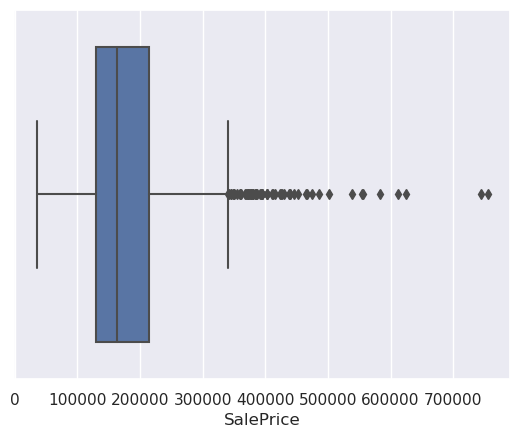

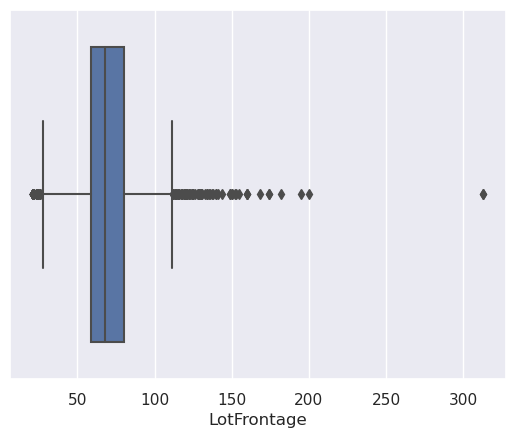

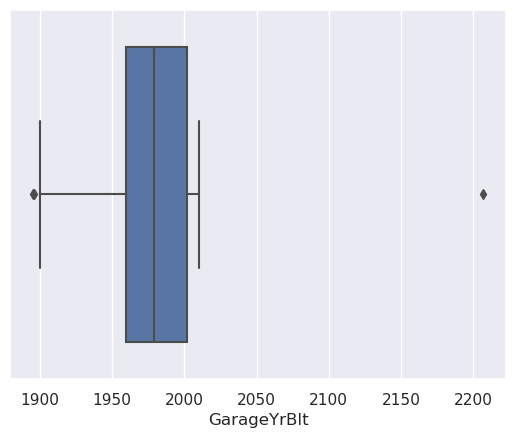

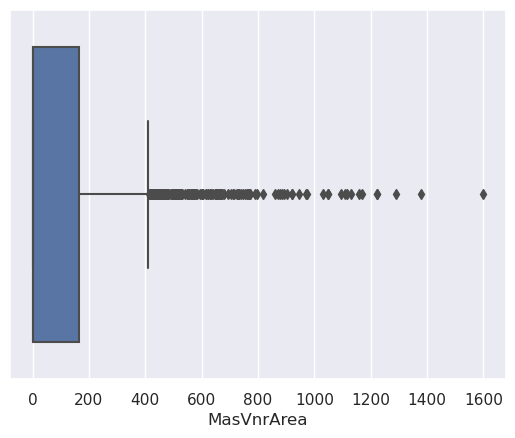

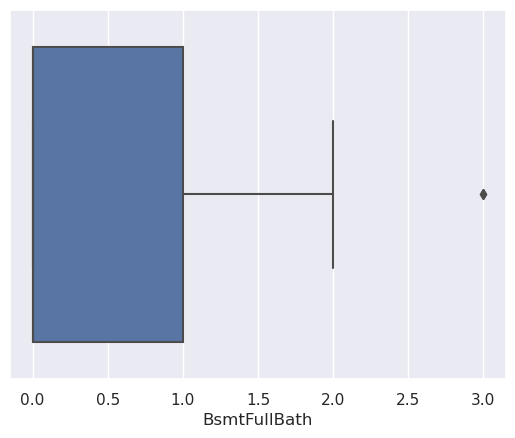

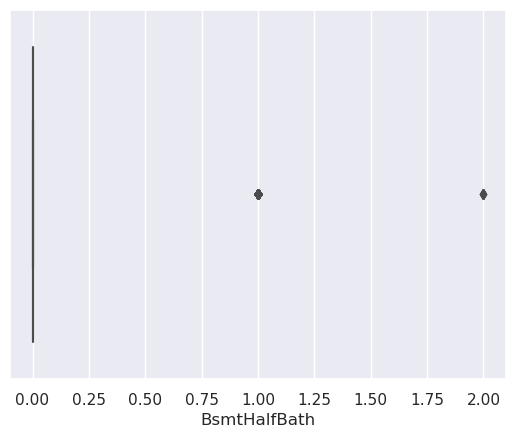

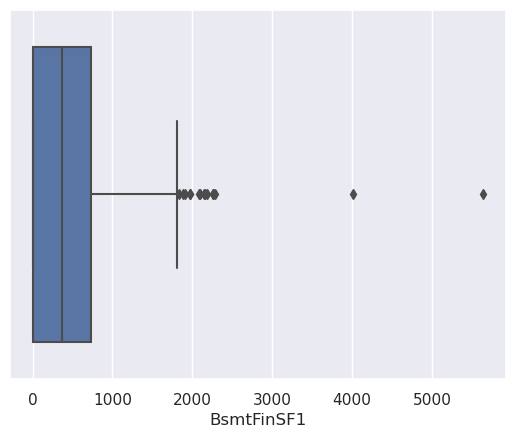

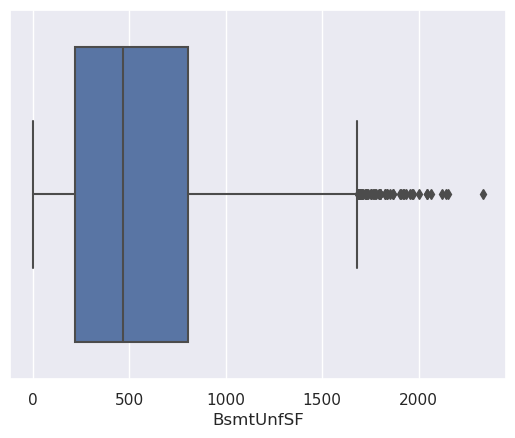

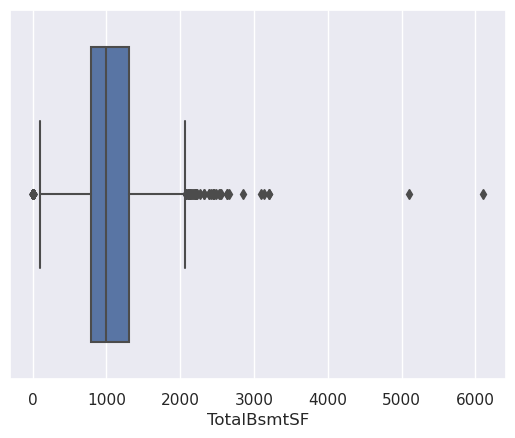

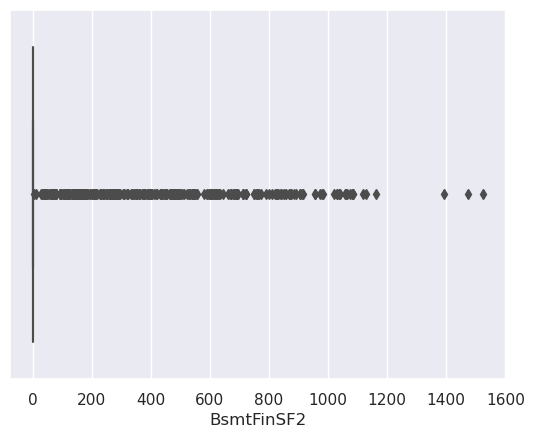

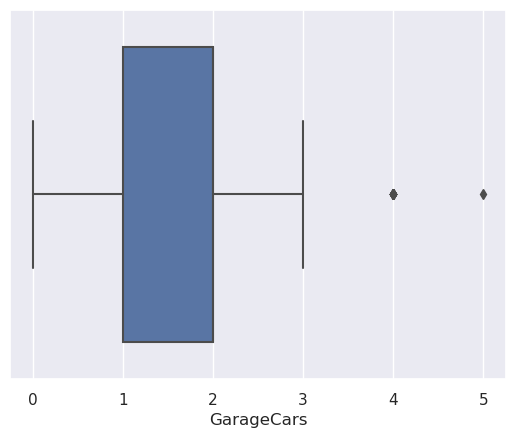

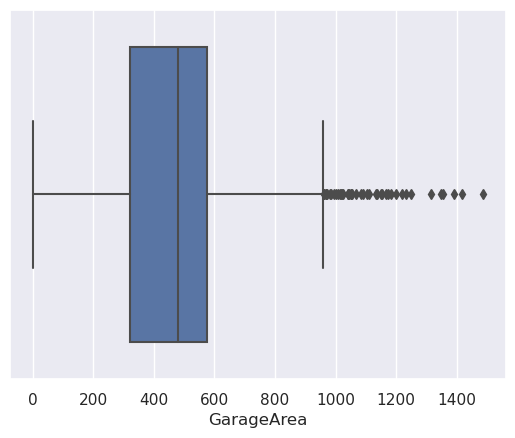

In [18]:
for i in imputed_columns.select_dtypes('float64').columns:
    sns.boxplot(x =i , data = imputed_columns)
    plt.show()

In [19]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())

In [20]:
# removing 'BsmtCond', 'BsmtQual'  , 'BsmtExposure' as NA there is intentional

In [21]:
missing = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns = ['Values']).reset_index()
missing.sort_values(by=['Values'],inplace=True,ascending=False)
missing[missing['Values'] > 0.0]['index'].values

array(['SalePrice', 'GarageCond', 'GarageQual', 'GarageFinish',
       'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning',
       'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 'Functional',
       'GarageCars', 'Exterior2nd', 'Exterior1st', 'Electrical',
       'SaleType', 'KitchenQual'], dtype=object)

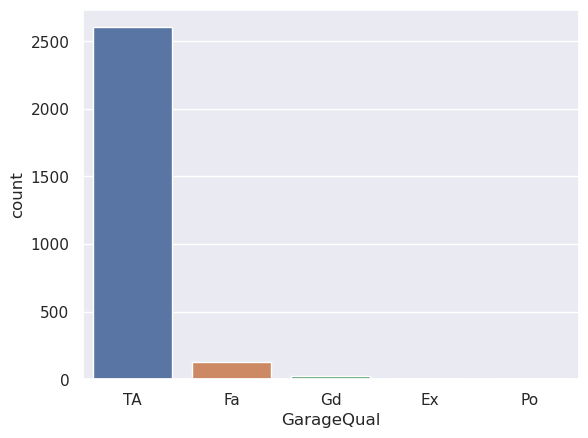

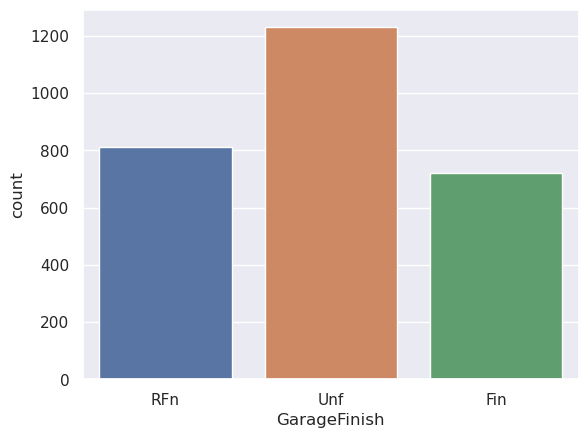

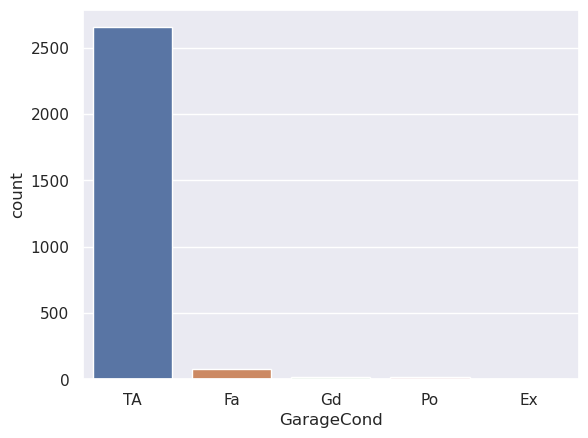

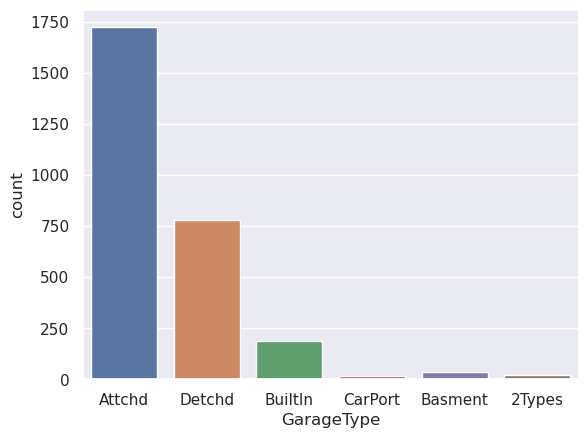

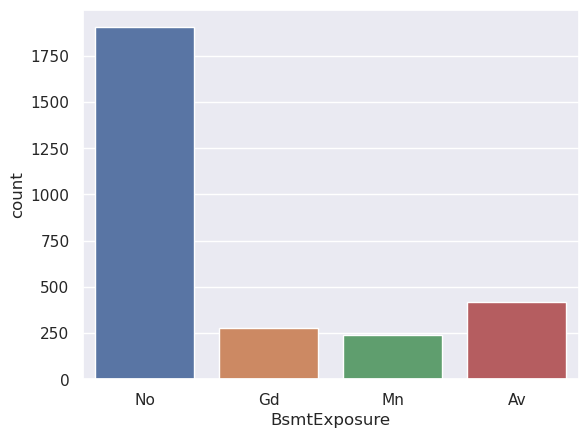

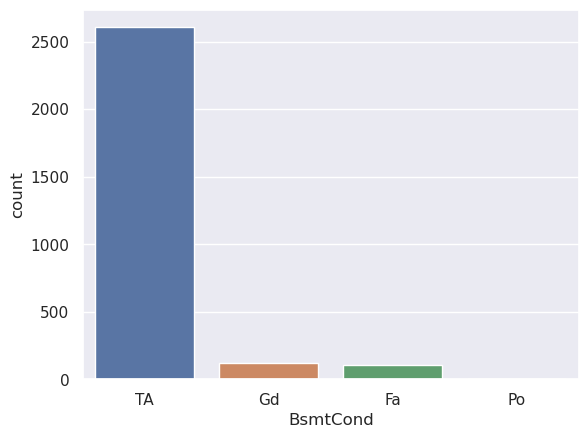

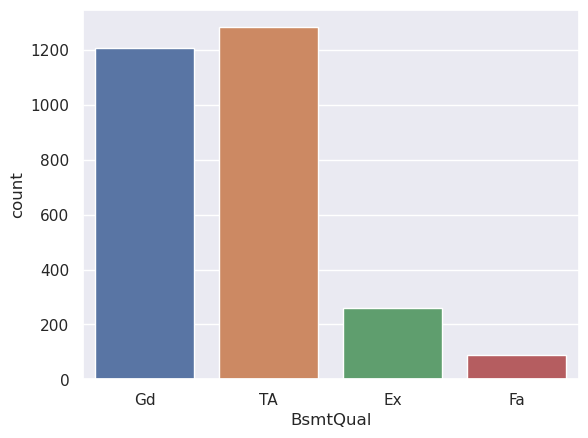

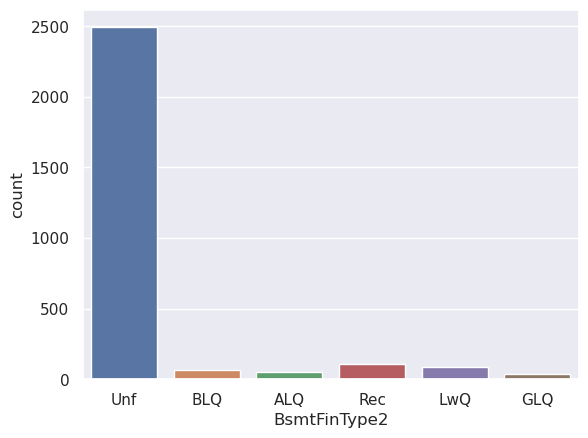

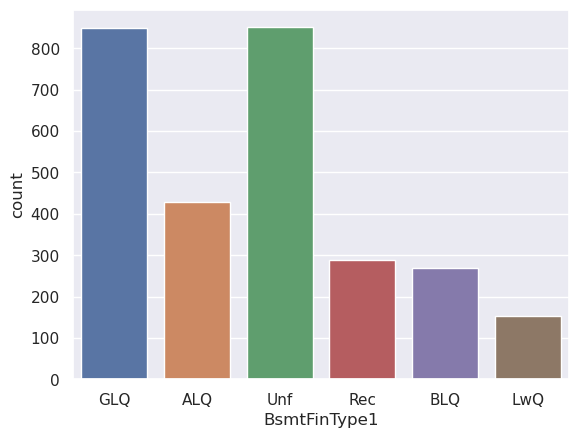

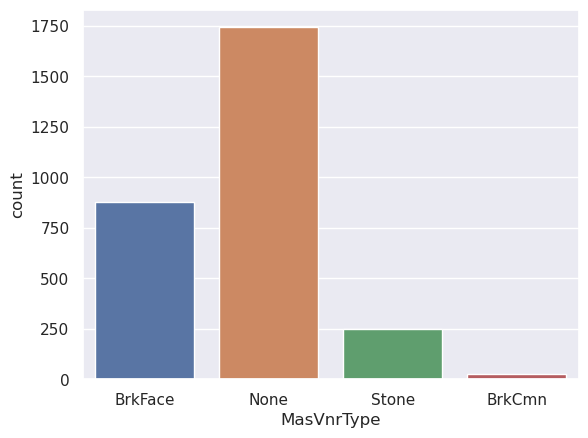

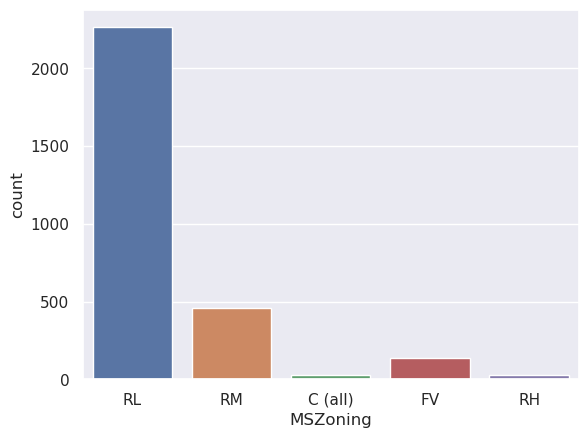

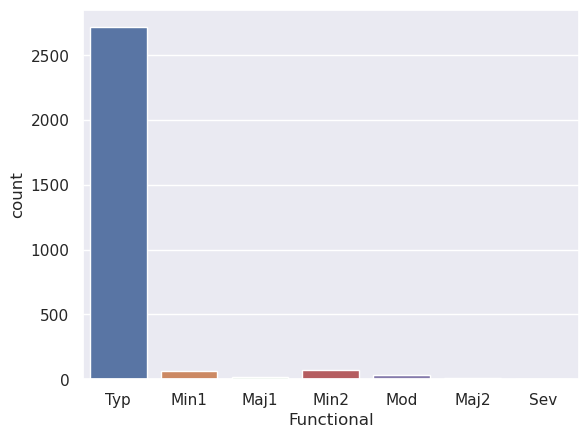

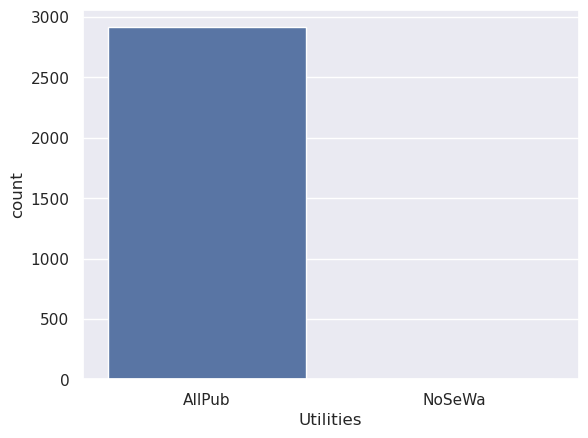

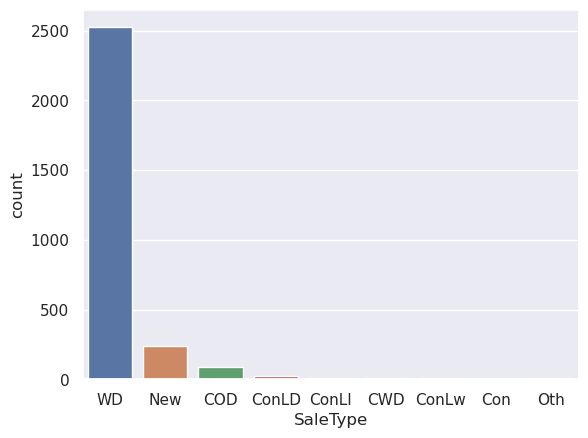

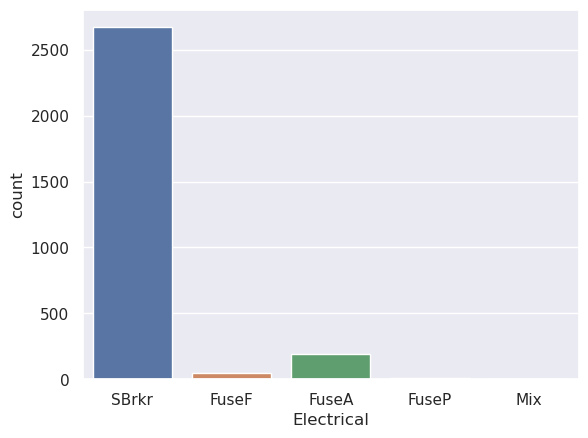

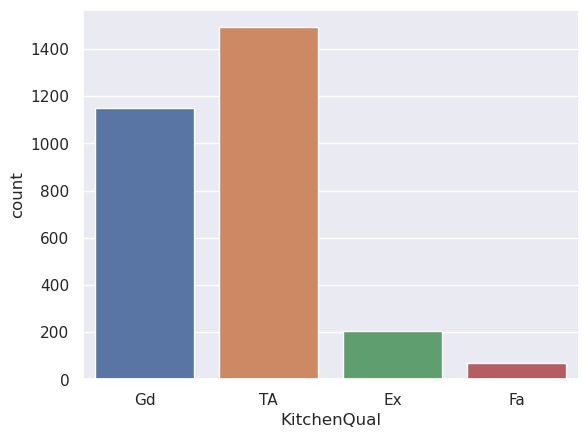

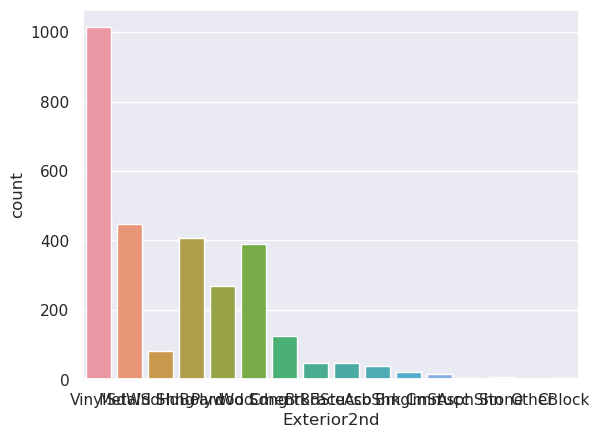

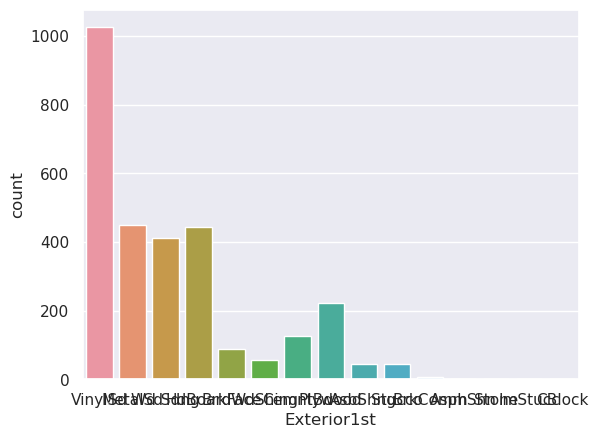

In [22]:
for col in imputed_columns.select_dtypes('object').columns :
    sns.countplot(x = col , data = df)
    plt.show()

In [23]:
empties = []
for col in df.select_dtypes('object').columns :
    print(f'Column values for {col} : {set(df[col].values)}')
    if np.nan in set(df[col].values)  :
        empties.append(col)
                     


Column values for MSZoning : {'RM', 'RH', nan, 'C (all)', 'FV', 'RL'}
Column values for Street : {'Grvl', 'Pave'}
Column values for LotShape : {'IR1', 'IR3', 'IR2', 'Reg'}
Column values for LandContour : {'Low', 'HLS', 'Lvl', 'Bnk'}
Column values for Utilities : {'NoSeWa', 'AllPub', nan}
Column values for LotConfig : {'CulDSac', 'Corner', 'FR2', 'FR3', 'Inside'}
Column values for LandSlope : {'Gtl', 'Sev', 'Mod'}
Column values for Neighborhood : {'Blmngtn', 'Timber', 'Crawfor', 'MeadowV', 'OldTown', 'Blueste', 'NoRidge', 'ClearCr', 'NPkVill', 'BrkSide', 'NridgHt', 'Gilbert', 'Mitchel', 'NAmes', 'StoneBr', 'SawyerW', 'IDOTRR', 'SWISU', 'Sawyer', 'BrDale', 'CollgCr', 'Somerst', 'Edwards', 'Veenker', 'NWAmes'}
Column values for Condition1 : {'RRAn', 'RRNe', 'PosN', 'Feedr', 'RRNn', 'Norm', 'RRAe', 'Artery', 'PosA'}
Column values for Condition2 : {'RRAn', 'PosN', 'Feedr', 'RRNn', 'Norm', 'RRAe', 'Artery', 'PosA'}
Column values for BldgType : {'Duplex', 'TwnhsE', '2fmCon', 'Twnhs', '1Fam'}


In [24]:
empties

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [25]:
'''
Out of the categorical columns with the NO values , most of them are intended to show that the faciltiy does not exists
like :
'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure',
'BsmtFinType2', 'BsmtFinType1', 'BsmtQual'

For 'MasVnrType', 'Electrical' : we needf to replace the NA with the mojority value.

'''
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure',
'BsmtFinType2', 'BsmtFinType1', 'BsmtQual','BsmtCond'] :
    df[col] = df[col].fillna('None')

for col in ['MasVnrType', 'Electrical','MSZoning','Utilities','Exterior1st',
            'MasVnrType','KitchenQual','Functional','SaleType','BsmtHalfBath',
            'BsmtFullBath','GarageCars','Exterior2nd'] :
    df[col] = df[col].fillna(df[col].mode()[0])    

<p> Based on the description text  , we see that some columns have mapping show a relation between them , creatinhg ordinal scale based on it 

In [26]:
KitchenQual ={
    'Ex' : 5 , 
    'Gd' : 4 ,
    'TA' : 3 ,
    'Fa' : 2 ,
    'Po' : 1
}
df['KitchenQual'] = df['KitchenQual'].map(KitchenQual)

In [27]:
LotShape ={
    'Reg' : 4 ,
    'IR1' : 3 ,
    'IR2' : 2 ,
    'IR3' : 1
}
df['LotShape'] = df['LotShape'].map(LotShape)

In [28]:
LandContour ={
        'Low' : -1 , 
        'Lvl' : 0 ,
        'Bnk' : 1 ,
        'HLS' : 2
}
df['LandContour'] = df['LandContour'].map(LandContour)

In [29]:
LandSlope = {
       'Gtl' : 1 , 
       'Mod' : 2 , 
       'Sev' : 3
}

df['LandSlope'] = df['LandSlope'].map(LandSlope)

In [30]:
Utilities = {
'AllPub' : 4 ,
'NoSewr' : 3 ,
'NoSeWa' : 2,
'ELO' : 1 ,
'None' : 0
}
df['Utilities'] = df['Utilities'].map(Utilities)

In [31]:
ExterQual = {
'Ex' : 5,
'Gd' : 4,
'TA' : 3,
'Fa' : 2,
'Po' : 1 
}
df['ExterQual'] = df['ExterQual'].map(ExterQual)
df['ExterCond'] = df['ExterCond'].map(ExterQual)

In [32]:

BsmtExposure = {
'Gd': 4 , 
'Av': 3 ,
'Mn': 2 ,
'No': 1 ,
'None': 0
}

df['BsmtExposure'] = df['BsmtExposure'].map(BsmtExposure)

In [33]:
BsmtFinType ={
'GLQ' : 7,
'ALQ'   : 6,
'BLQ'   : 5,
'Rec'   : 4,
'LwQ'   : 3,
'Unf'   : 2,
'None'  : 1
    
}

df['BsmtFinType1'] = df['BsmtFinType1'].map(BsmtFinType)
df['BsmtFinType2'] = df['BsmtFinType2'].map(BsmtFinType)

In [34]:
HeatingQC = {
       'Ex' : 5,
       'Gd' : 4,
       'TA' : 3,
       'Fa' : 2,
       'Po' : 1
}

df['HeatingQC'] = df['HeatingQC'].map(HeatingQC)

In [35]:
CentralAir = {
    'N' : 0 ,
    'Y' : 1
}


df['CentralAir'] = df['CentralAir'].map(CentralAir)

In [36]:
GarageFinish = {
    'Fin' : 3 , 
    'RFn' : 2 , 
    'Unf' : 1 ,
    'None' : 0
}

df['GarageFinish'] = df['GarageFinish'].map(GarageFinish)

In [37]:
GarageQual = {
       'Ex' : 5,
       'Gd' : 4,
       'TA' : 3,
       'Fa' : 2,
       'Po' : 1,
       'None' : 0
}

df['GarageQual'] = df['GarageQual'].map(GarageQual)

In [38]:
GarageCond = {
       'Ex' : 5,
       'Gd' : 4,
       'TA' : 3,
       'Fa' : 2,
       'Po' : 1,
       'None' : 0
}

df['GarageCond'] = df['GarageCond'].map(GarageCond)

In [39]:
PavedDrive = {
    'Y' : 3,
    'P' : 2 ,
    'N' : 1 ,
    'None': 0  
    
}

df['PavedDrive'] = df['PavedDrive'].map(PavedDrive)

In [40]:
Street = {
    'Grvl' : 0,
    'Pave' : 1
}
df['Street'] = df['Street'].map(Street)

In [41]:
 Bsmt ={
       'Ex': 5,
       'Gd': 4,
       'TA': 3,
       'Fa': 2,
       'Po': 1,
       'None': 0
                  }
df['BsmtQual'] = df['BsmtQual'].map(Bsmt)
df['BsmtCond'] = df['BsmtCond'].map(Bsmt)

In [42]:
     Functional ={  
        'Typ': 7,
        'Min1': 6,
        'Min2': 5,
        'Mod': 4,
        'Maj1': 3,
        'Maj2': 2,
        'Sev': 1,
        'Sal': 0
     }
df['Functional'] = df['Functional'].map(Functional) 

In [43]:
missing = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns = ['Values']).reset_index()
missing.sort_values(by=['Values'],inplace=True,ascending=False)
missing[missing['Values'] > 0.0].iloc[:,0].values


array(['SalePrice'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [45]:
nominal = ['MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','SaleType','SaleCondition']
for col in nominal :
    print(f'Column values for {col} : {set(df[col].values)}')

Column values for MSZoning : {'RM', 'RH', 'C (all)', 'FV', 'RL'}
Column values for Street : {0, 1}
Column values for LotConfig : {'CulDSac', 'Corner', 'FR2', 'FR3', 'Inside'}
Column values for Neighborhood : {'Blmngtn', 'Timber', 'Crawfor', 'MeadowV', 'OldTown', 'Blueste', 'NoRidge', 'ClearCr', 'NPkVill', 'BrkSide', 'NridgHt', 'Gilbert', 'Mitchel', 'NAmes', 'StoneBr', 'SawyerW', 'IDOTRR', 'SWISU', 'Sawyer', 'BrDale', 'CollgCr', 'Somerst', 'Edwards', 'Veenker', 'NWAmes'}
Column values for Condition1 : {'RRAn', 'RRNe', 'PosN', 'Feedr', 'RRNn', 'Norm', 'RRAe', 'Artery', 'PosA'}
Column values for Condition2 : {'RRAn', 'PosN', 'Feedr', 'RRNn', 'Norm', 'RRAe', 'Artery', 'PosA'}
Column values for BldgType : {'Duplex', 'TwnhsE', '2fmCon', 'Twnhs', '1Fam'}
Column values for HouseStyle : {'SFoyer', '1Story', '2.5Fin', 'SLvl', '2Story', '2.5Unf', '1.5Unf', '1.5Fin'}
Column values for RoofStyle : {'Shed', 'Gable', 'Flat', 'Gambrel', 'Mansard', 'Hip'}
Column values for RoofMatl : {'ClyTile', 'Membr

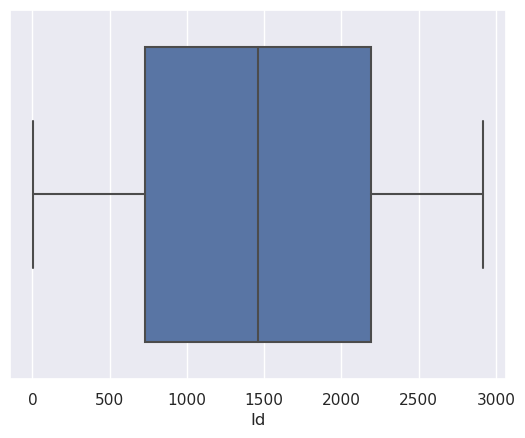

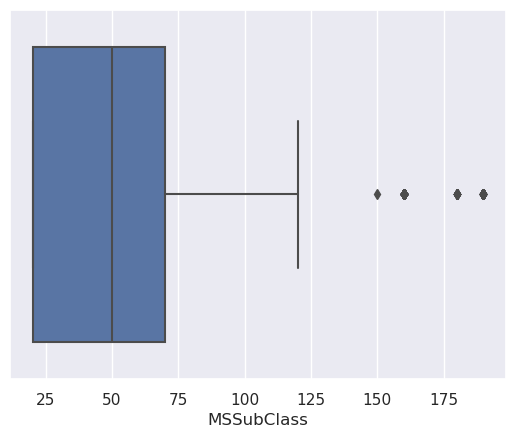

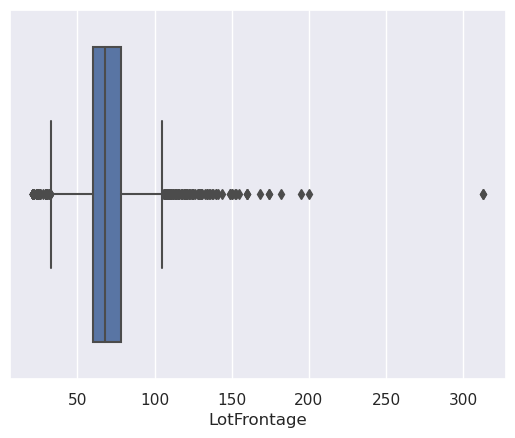

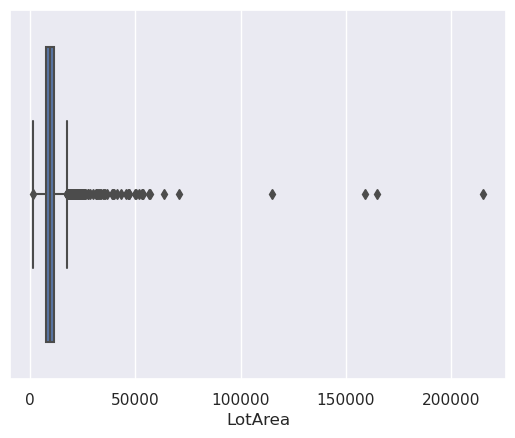

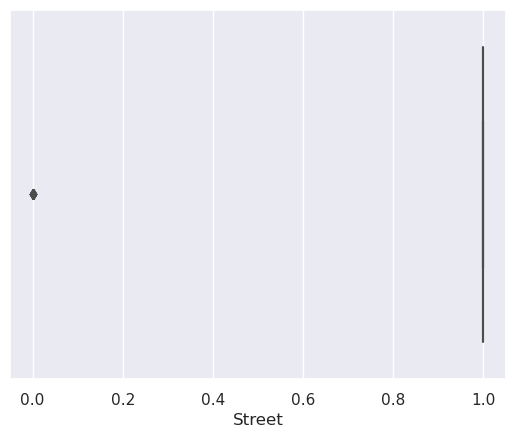

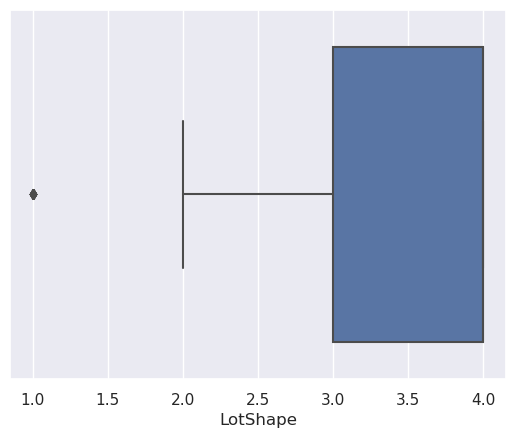

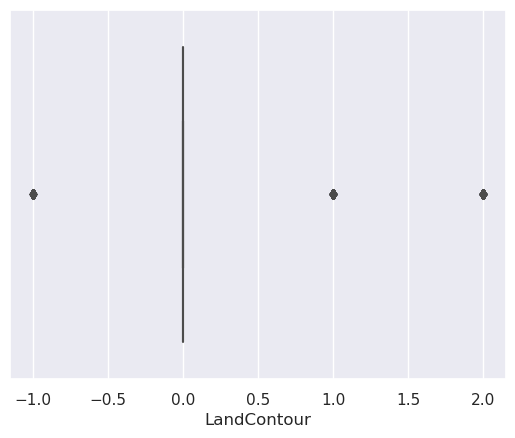

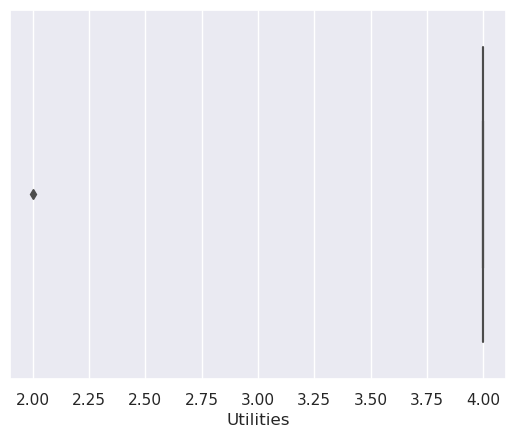

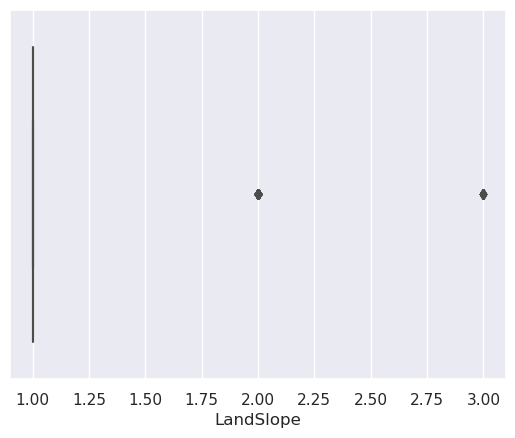

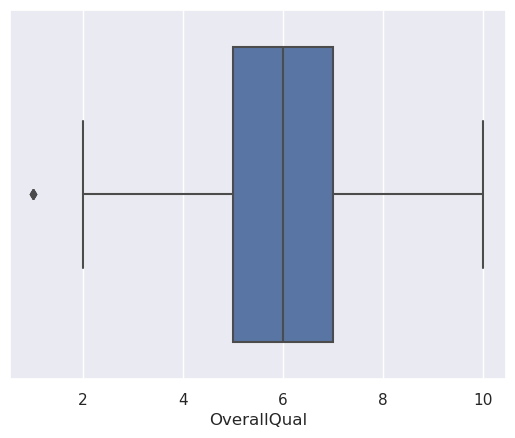

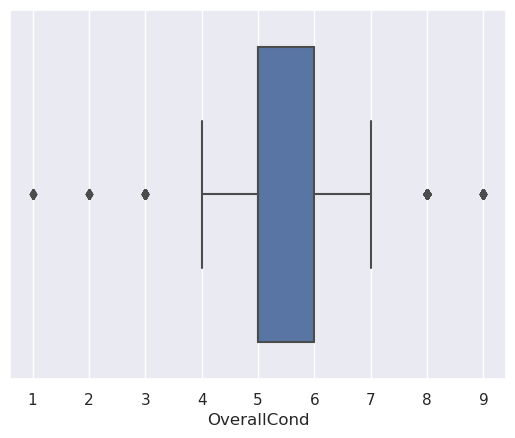

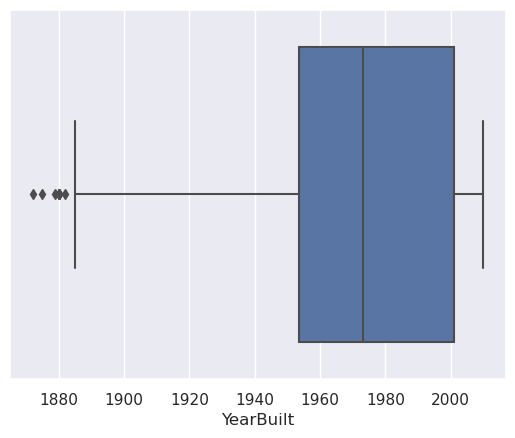

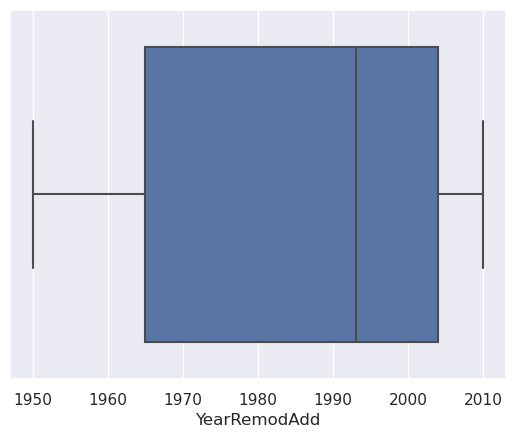

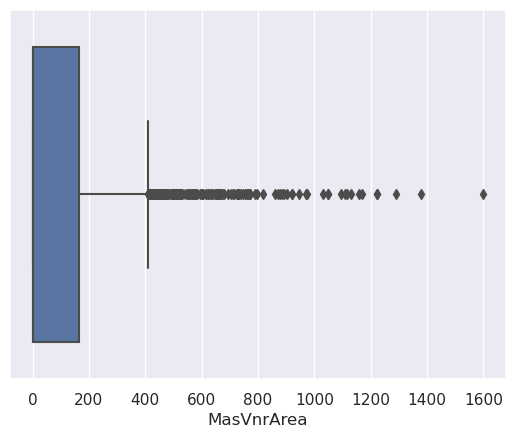

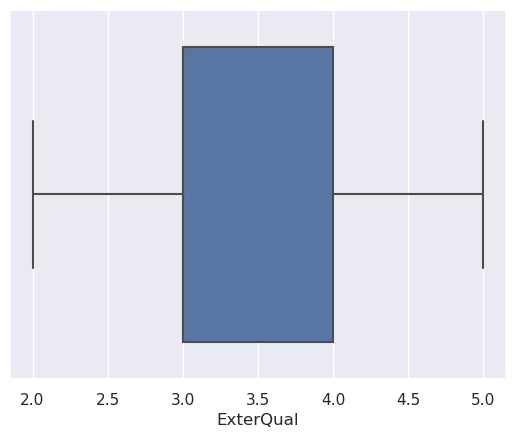

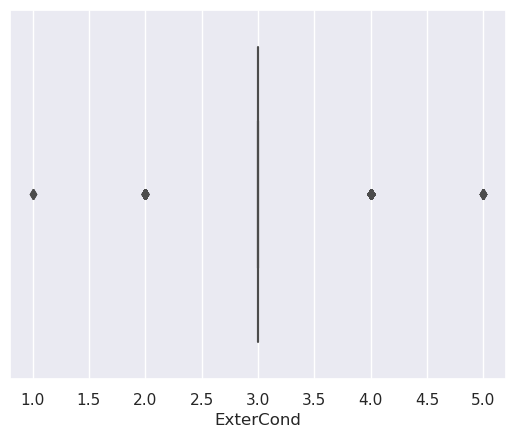

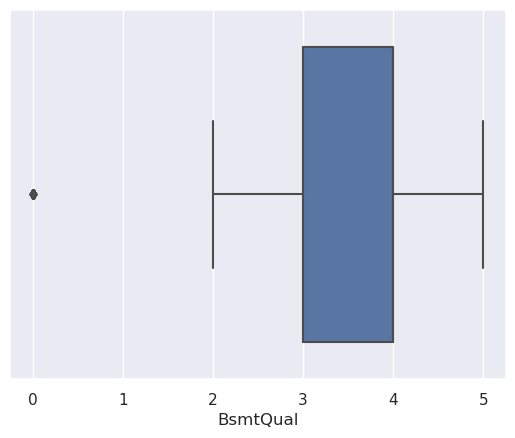

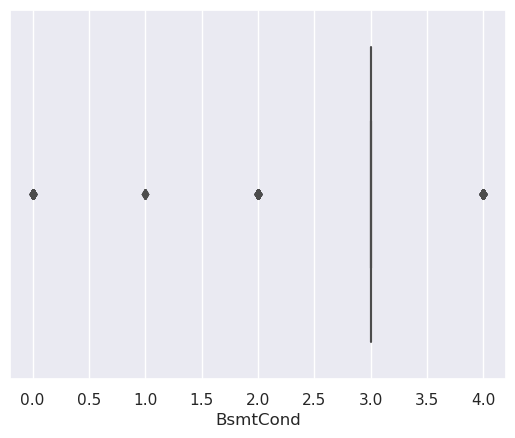

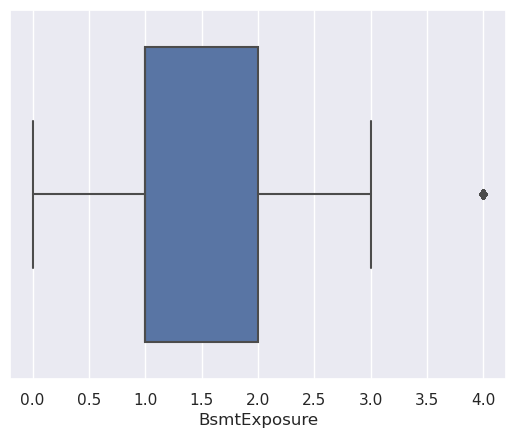

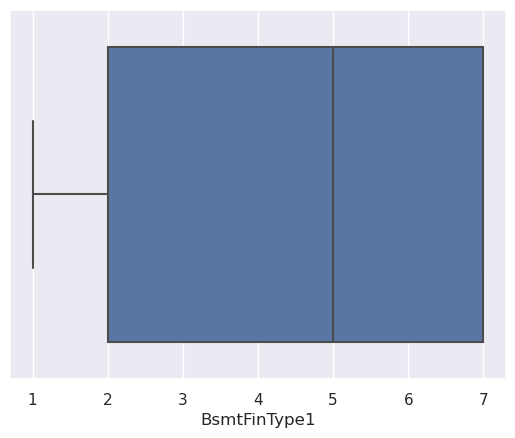

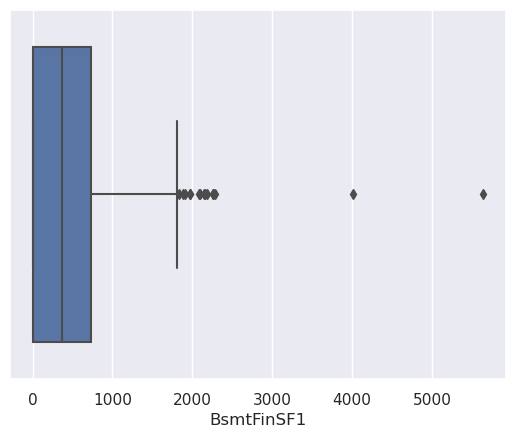

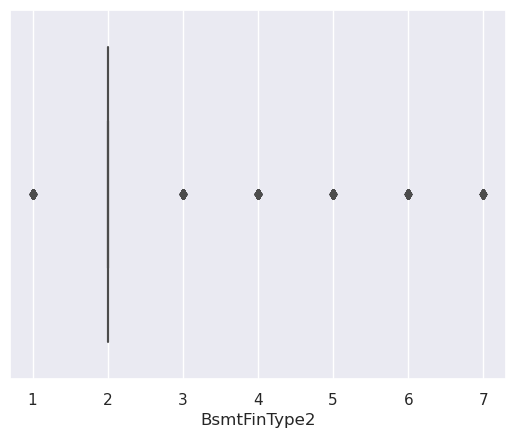

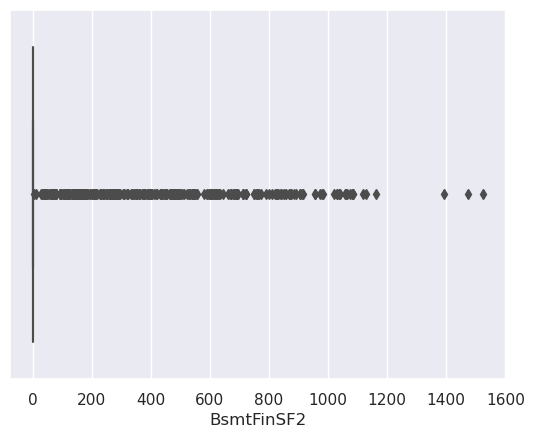

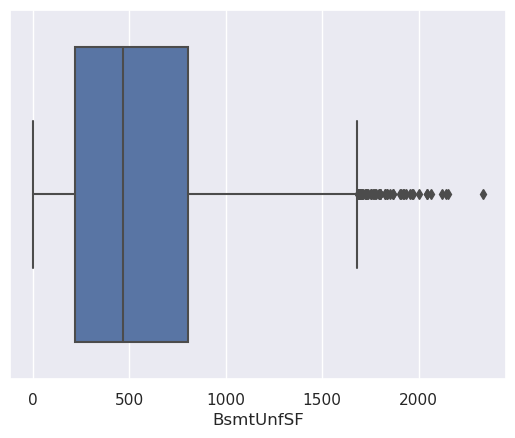

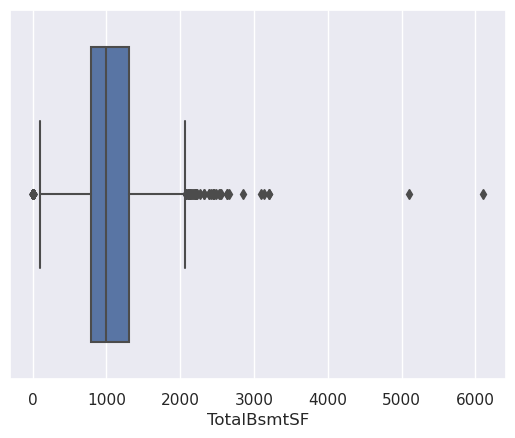

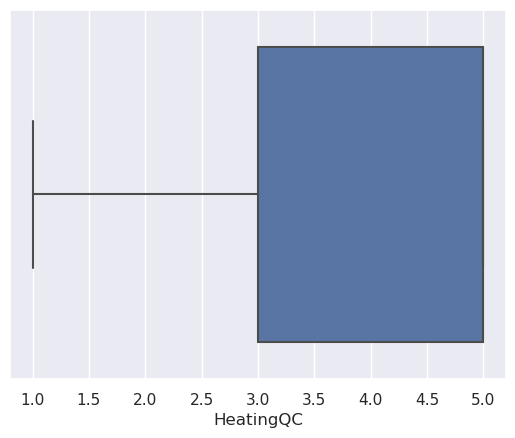

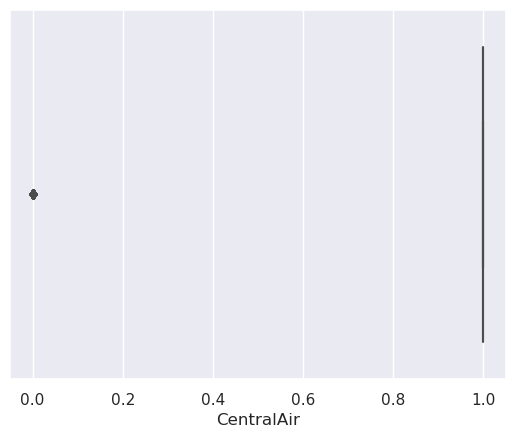

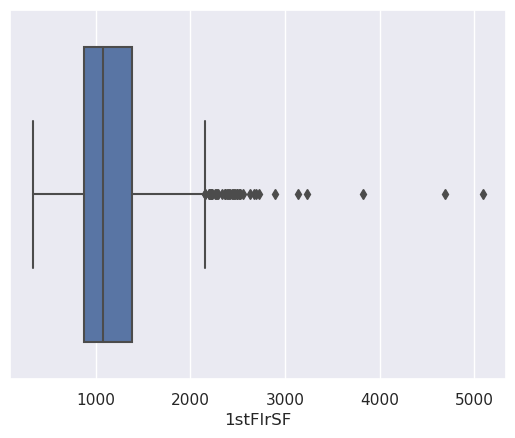

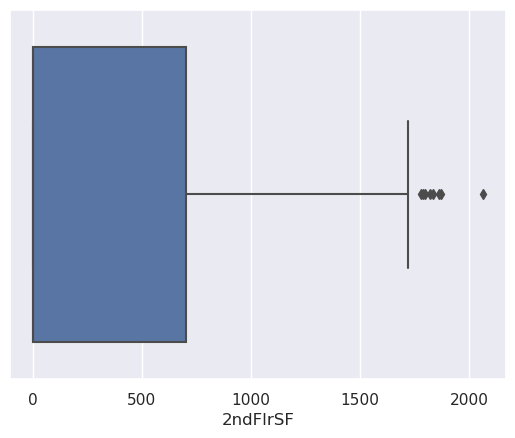

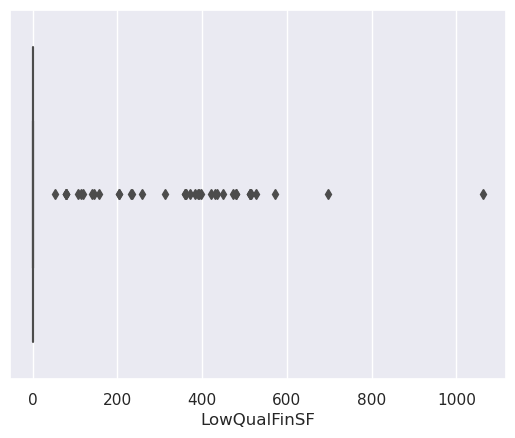

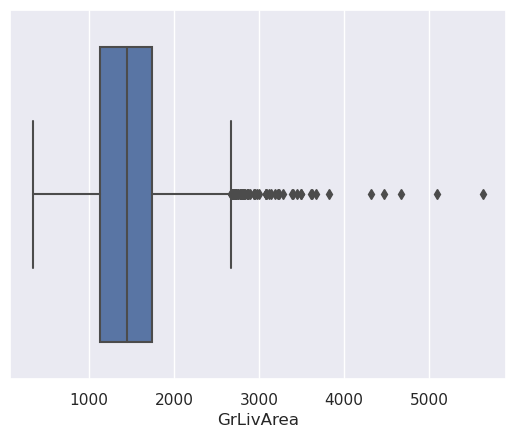

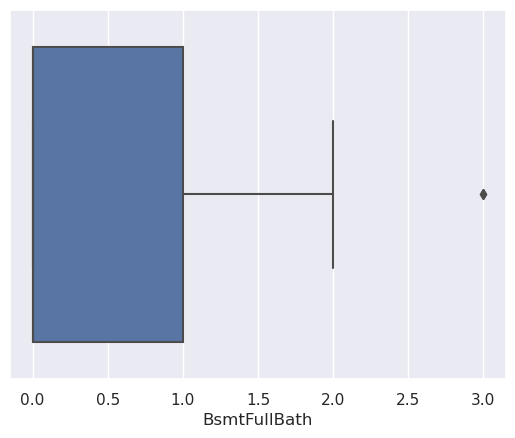

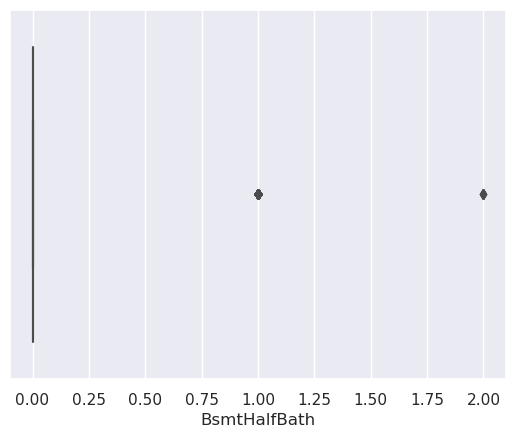

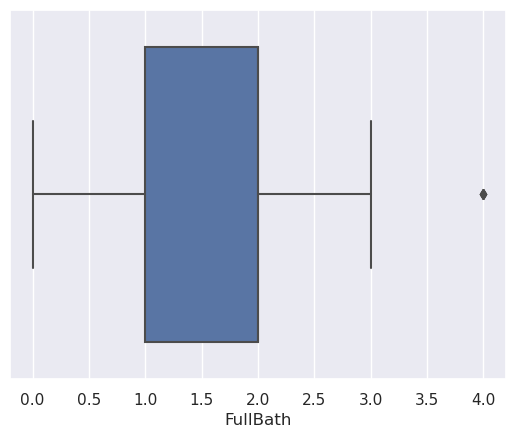

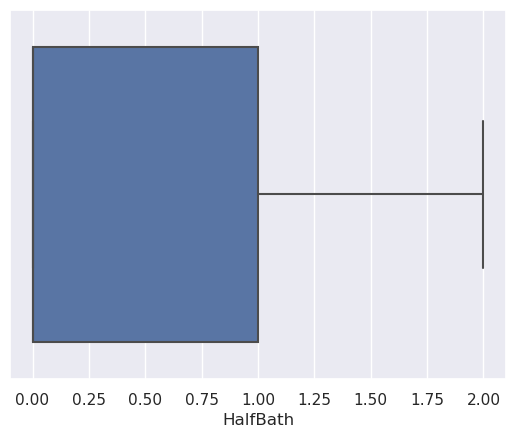

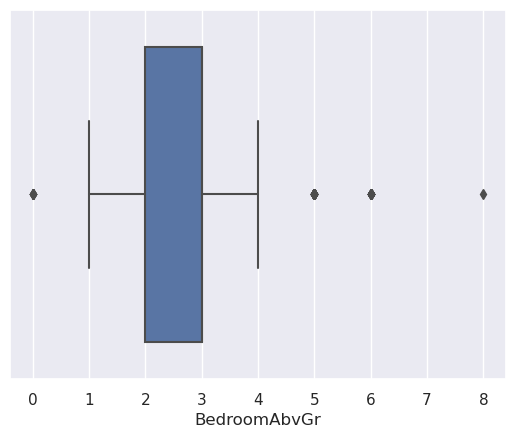

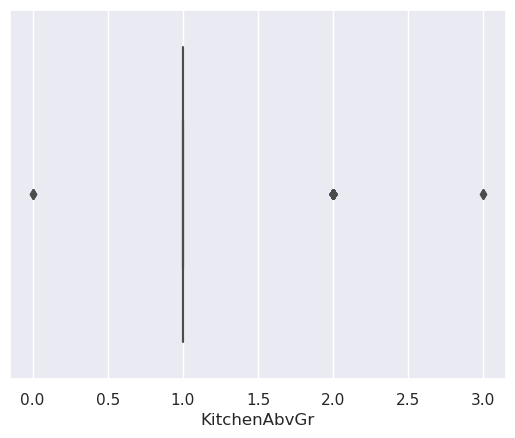

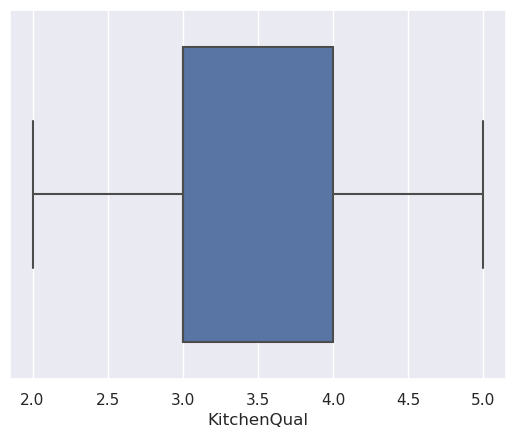

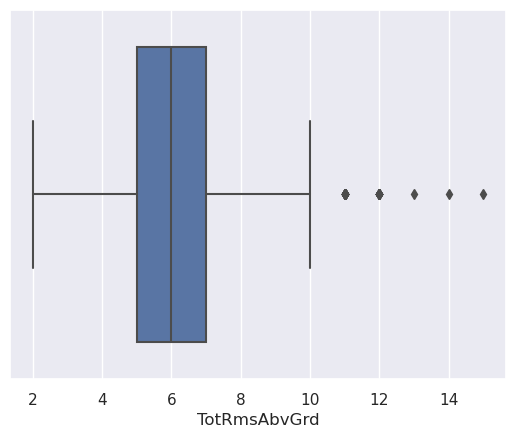

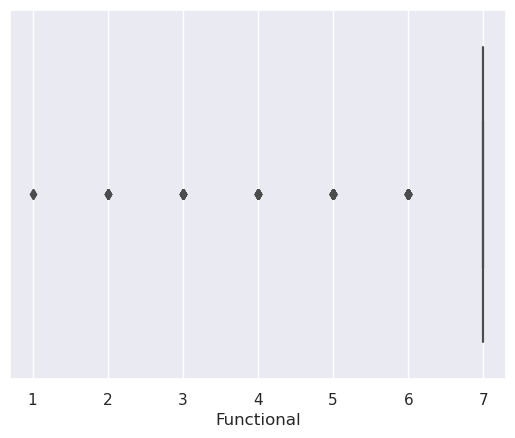

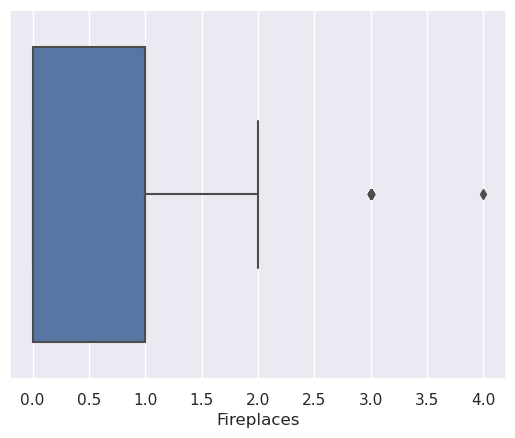

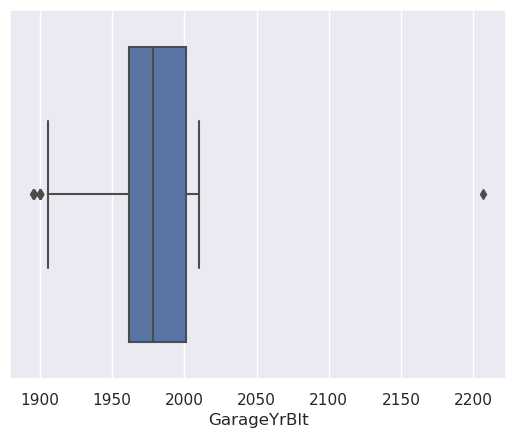

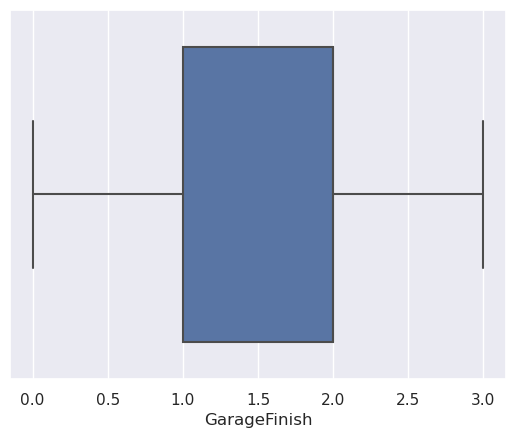

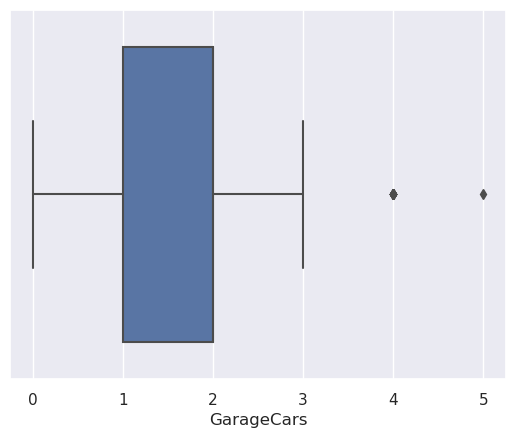

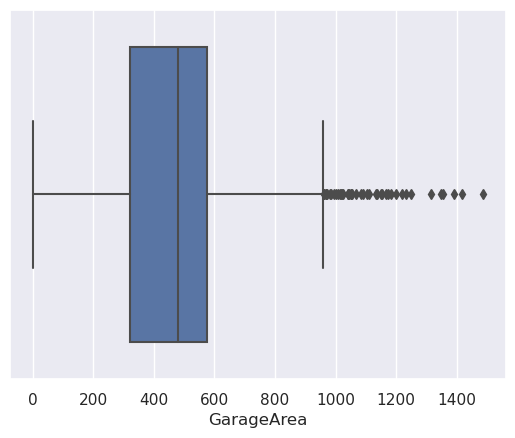

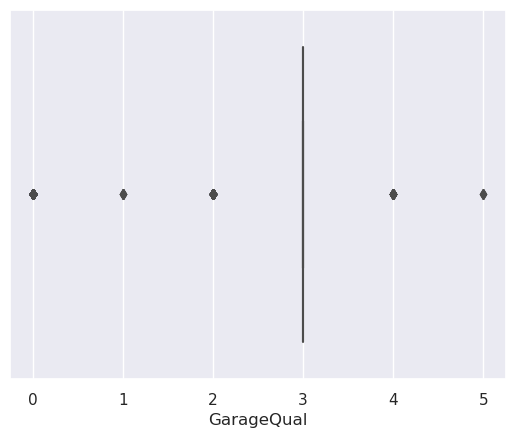

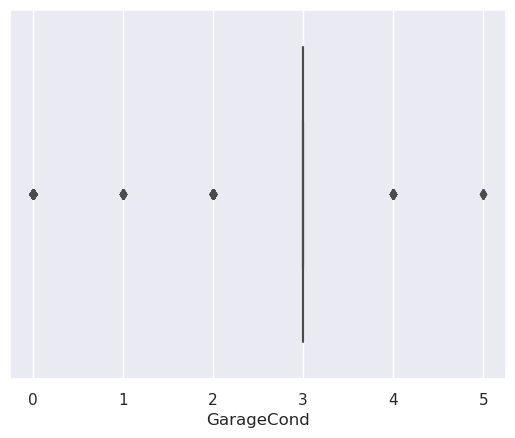

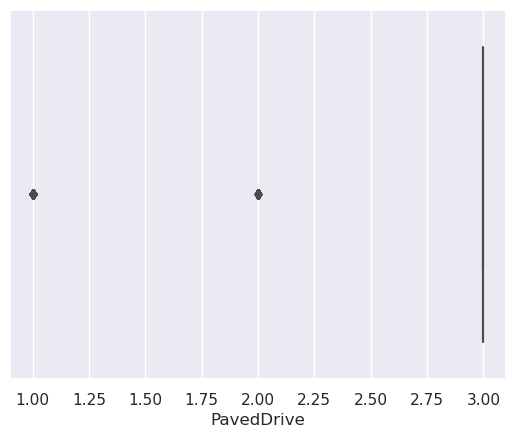

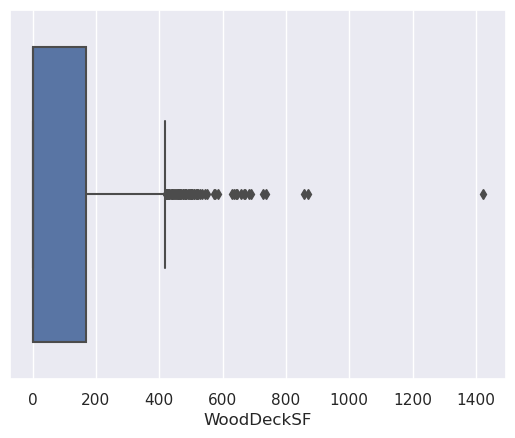

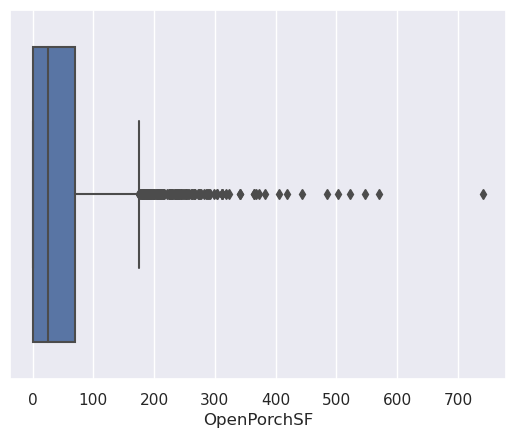

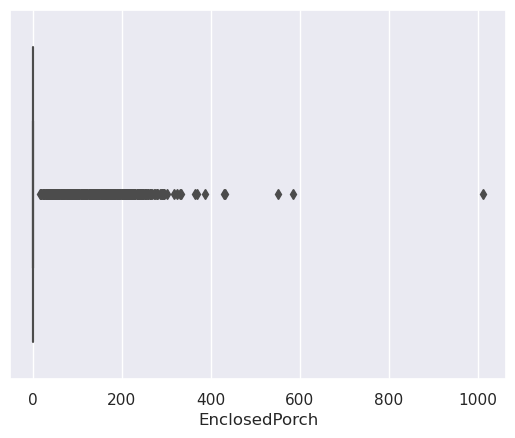

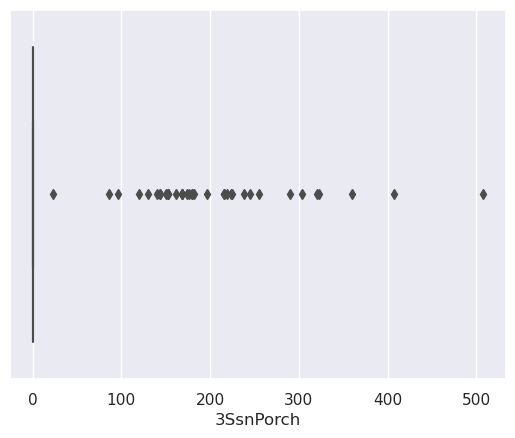

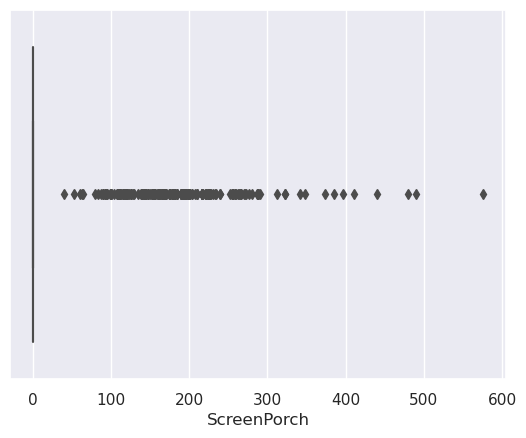

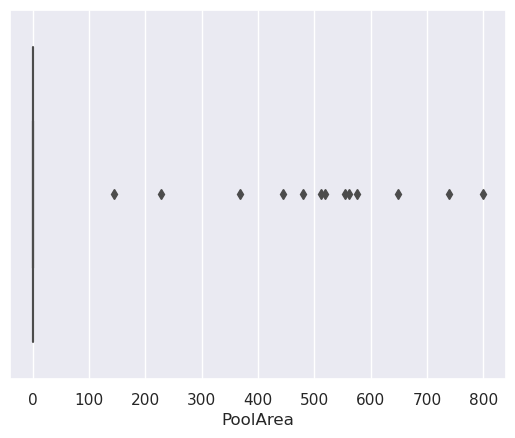

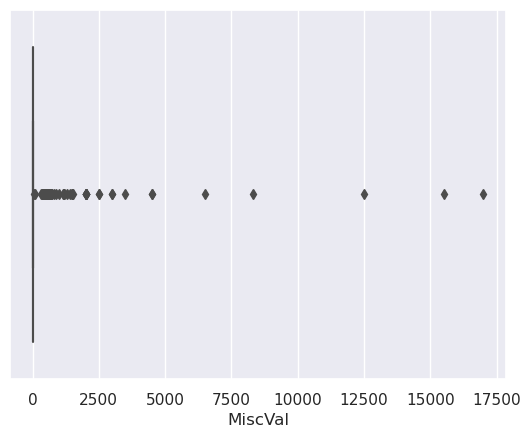

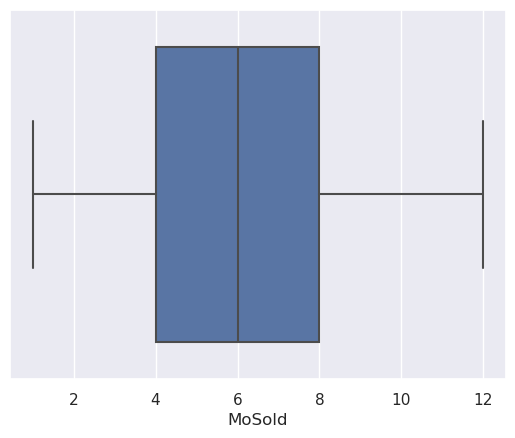

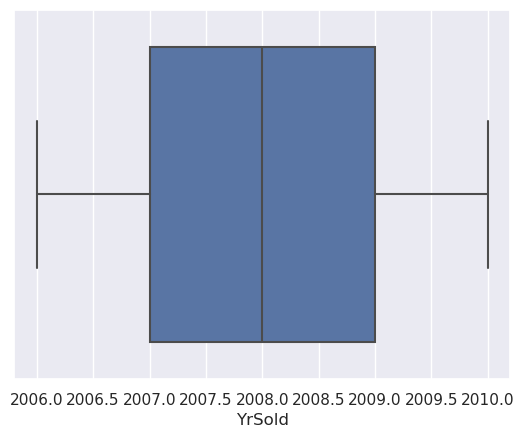

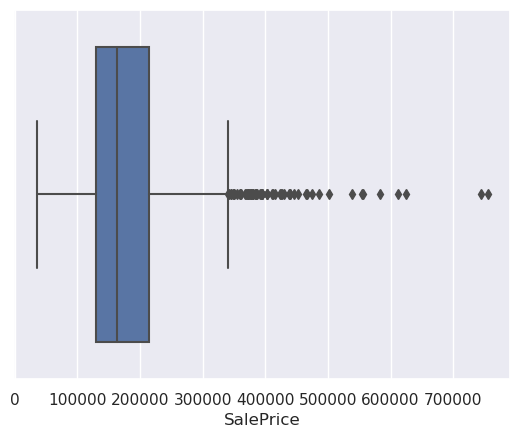

In [47]:
for col in df.select_dtypes(['float64','int64']).columns :
    sns.boxplot(x = col , data = df)
    #print(f'Column values for {col} : {set(df[col].values)}')
    plt.show()

'''

# Ordinal  - 
## Need to convert to numeric category
LotShape , LandContour ,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,
BsmtFinType1,BsmtFinType2 , HeatingQC ,CentralAir , KitchenQual , Functional  , GarageFinish , GarageQual ,
GarageCond

## Already converted to numeric
BsmtFullBath , BsmtHalfBath , FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces , GarageCars , 
MoSold , YrSold, OverallQual, OverallCond

# Nominal :

'MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','SaleType','SaleCondition'


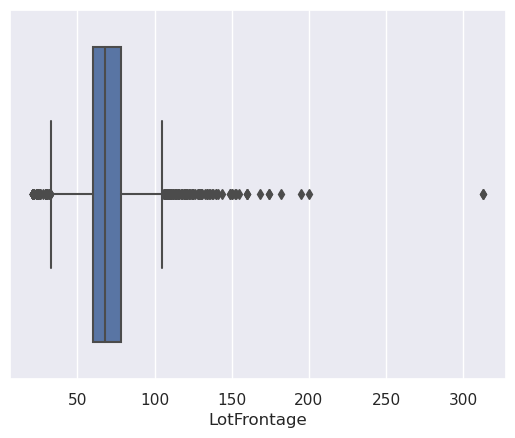

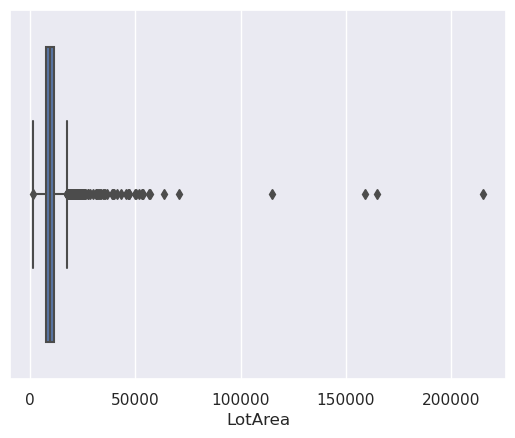

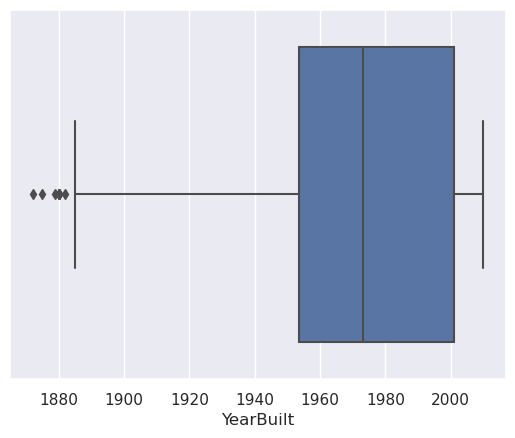

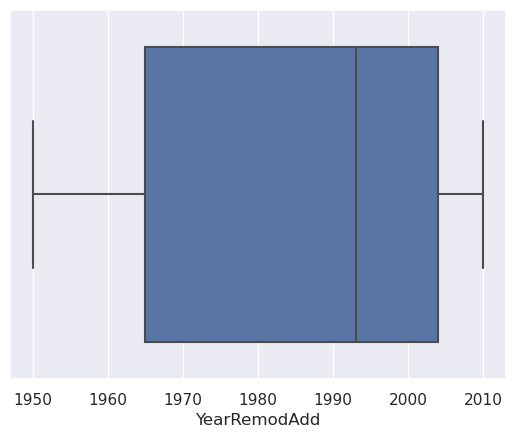

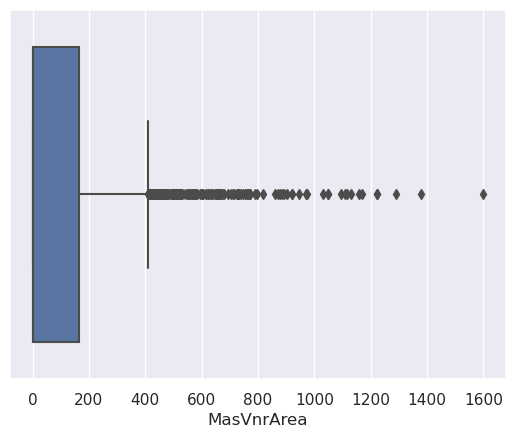

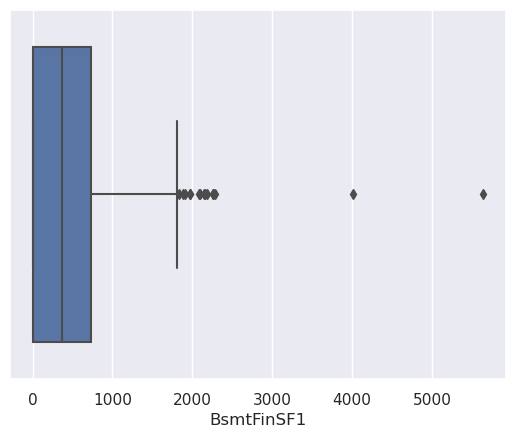

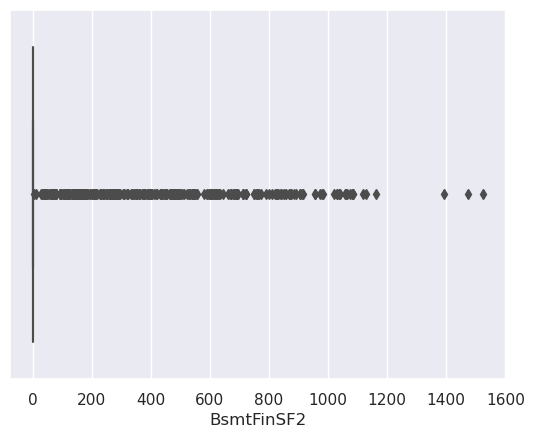

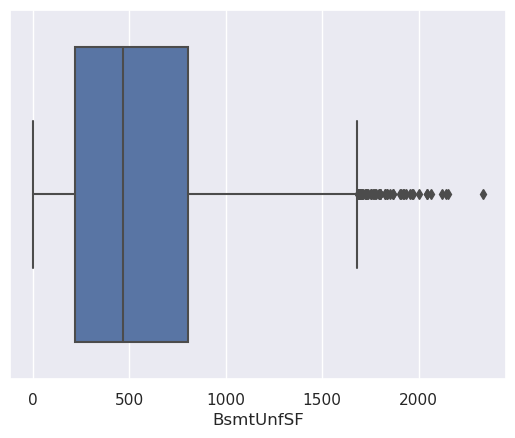

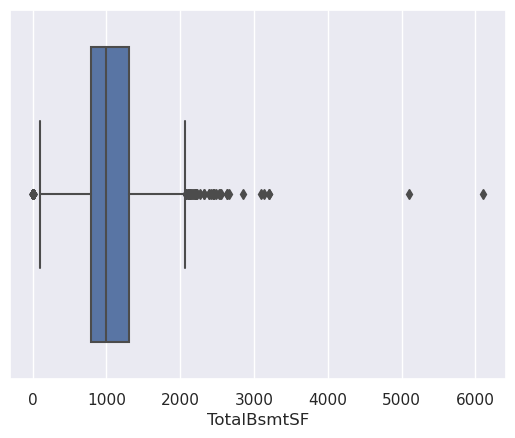

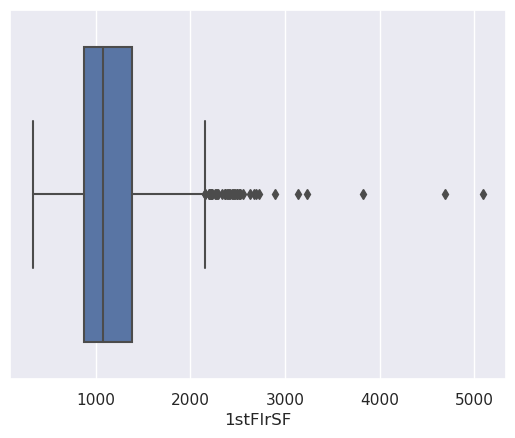

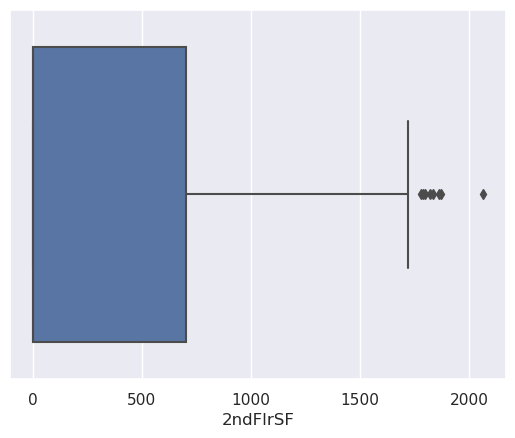

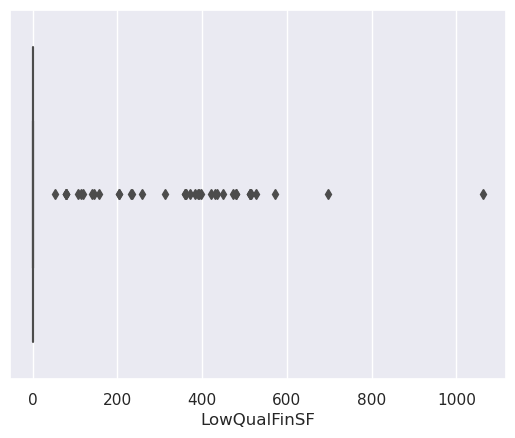

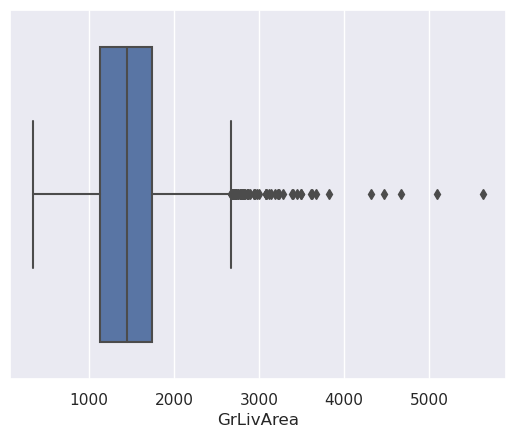

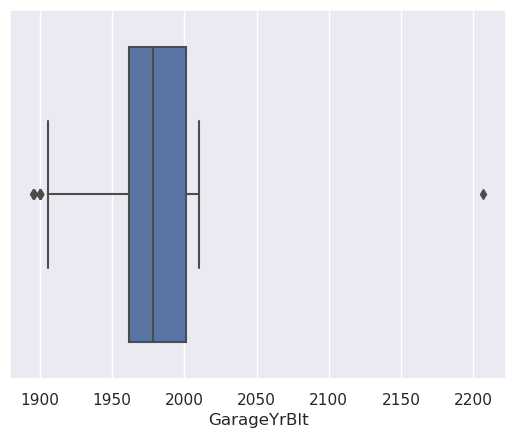

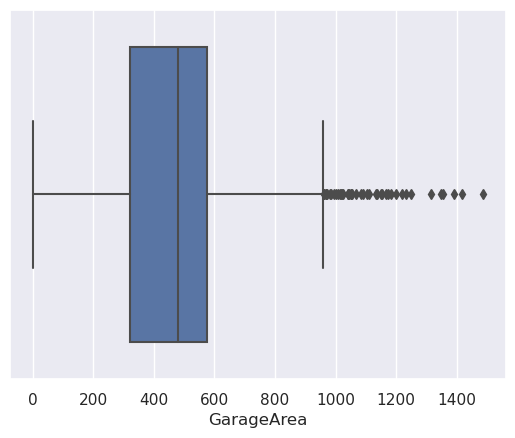

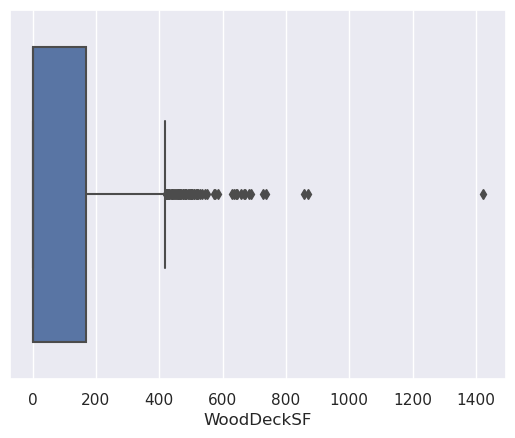

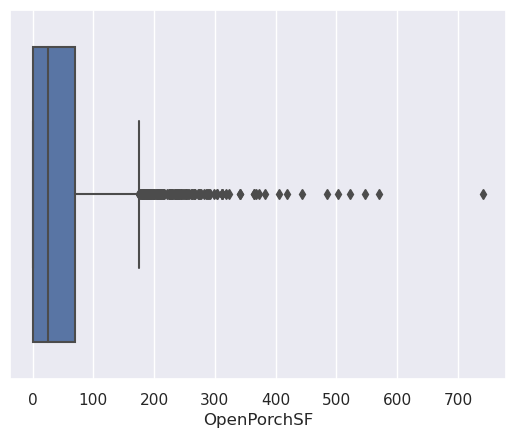

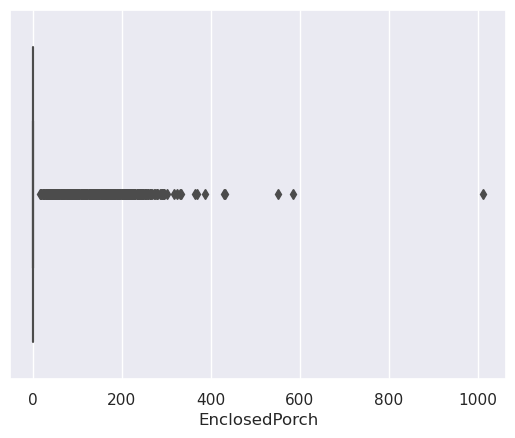

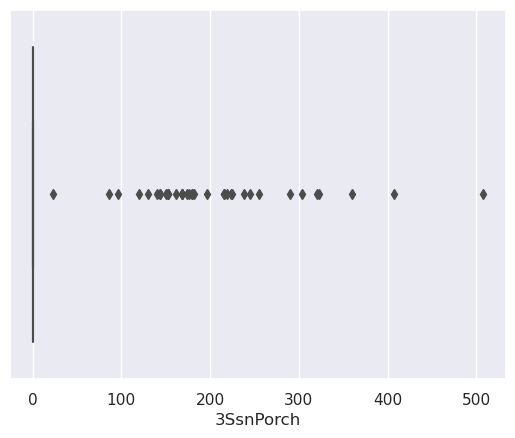

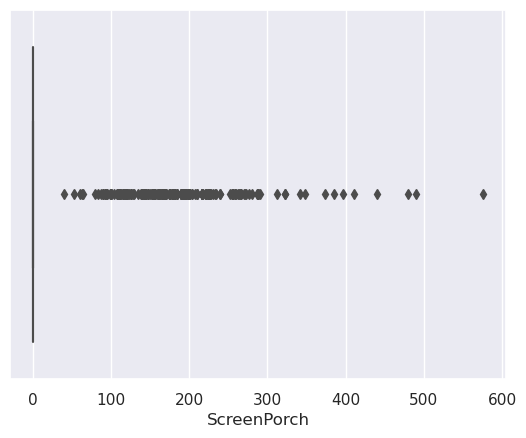

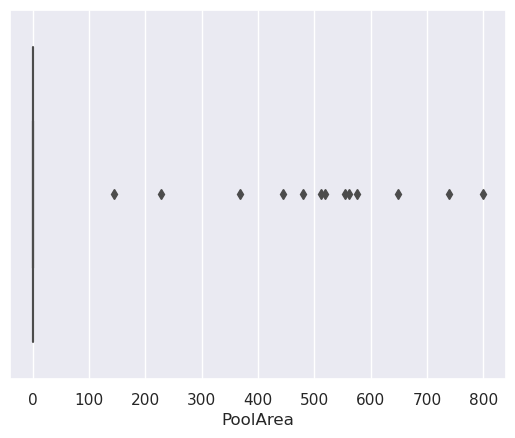

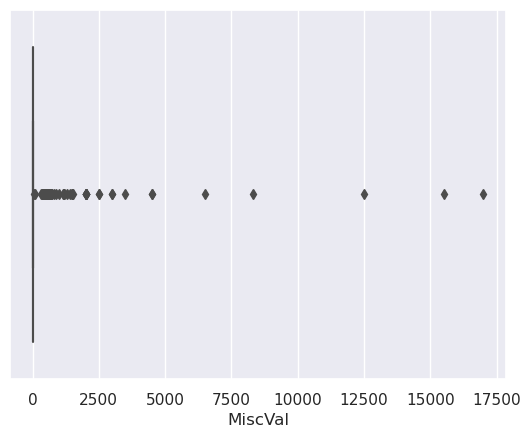

In [48]:
continuous = ['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',  'GarageYrBlt',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for col in continuous :
    sns.boxplot(x = col , data = df)    
    plt.show()
    #print(f'Column values for {col} : {sorted(set(df[col].values))}')

In [49]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [50]:
continuous = ['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',  'GarageYrBlt',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for col in continuous :
    outliers = find_outliers_IQR(df[col])

    print(f'%Age outliers for {col} : {(len(outliers)/len(df))*100 : .2f} ')

%Age outliers for LotFrontage :  8.91 
%Age outliers for LotArea :  4.39 
%Age outliers for YearBuilt :  0.31 
%Age outliers for YearRemodAdd :  0.00 
%Age outliers for MasVnrArea :  6.92 
%Age outliers for BsmtFinSF1 :  0.51 
%Age outliers for BsmtFinSF2 :  11.89 
%Age outliers for BsmtUnfSF :  1.82 
%Age outliers for TotalBsmtSF :  4.18 
%Age outliers for 1stFlrSF :  1.44 
%Age outliers for 2ndFlrSF :  0.27 
%Age outliers for LowQualFinSF :  1.37 
%Age outliers for GrLivArea :  2.54 
%Age outliers for GarageYrBlt :  0.31 
%Age outliers for GarageArea :  1.44 
%Age outliers for WoodDeckSF :  2.30 
%Age outliers for OpenPorchSF :  5.45 
%Age outliers for EnclosedPorch :  15.72 
%Age outliers for 3SsnPorch :  1.27 
%Age outliers for ScreenPorch :  8.77 
%Age outliers for PoolArea :  0.45 
%Age outliers for MiscVal :  3.53 


In [51]:
def cap_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    low , high = q1 - 1.5 * IQR , q3 + 1.5 * IQR
    return np.where(df > high , high , np.where(df < low,low,df))

In [52]:
# checking above we see that the outliers are not in high portion of the columns , 
# we cap the ouliers in the non zero- inflated columns

iqr_fix = ['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
           'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 
           'GarageYrBlt',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

for col in iqr_fix :
    
    df[col] = cap_outliers_IQR(df[col])

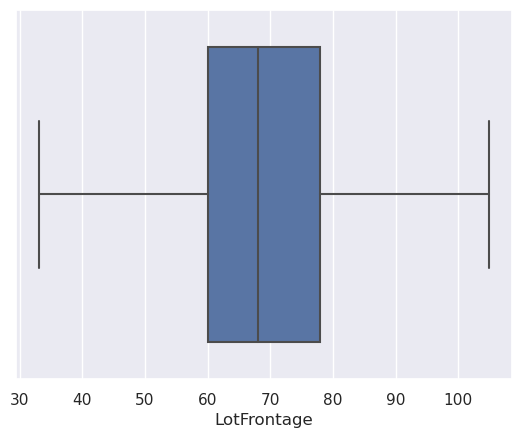

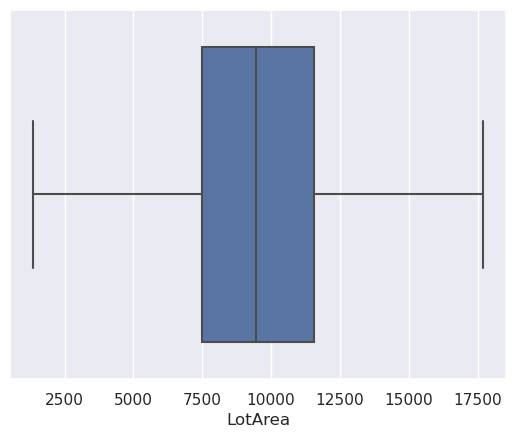

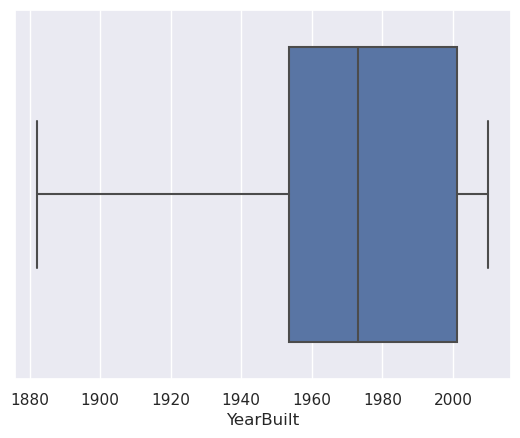

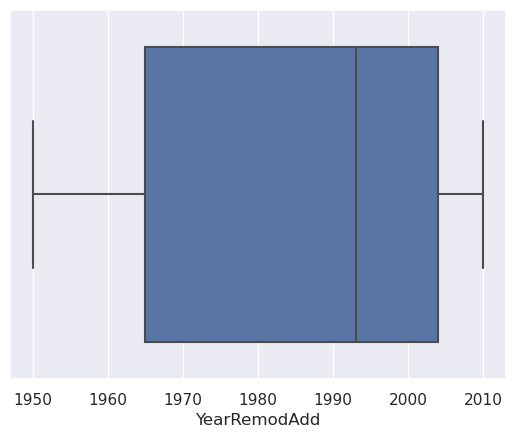

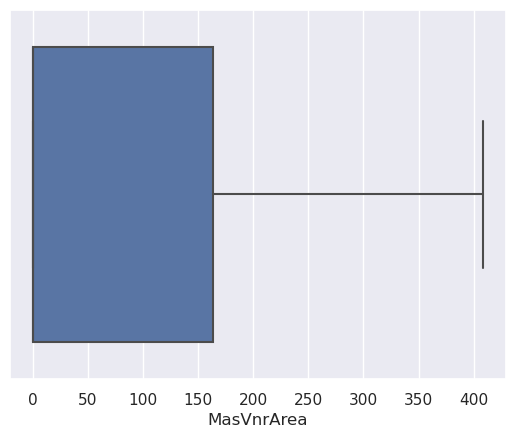

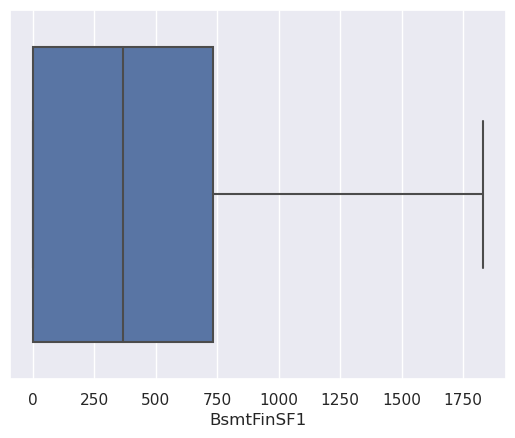

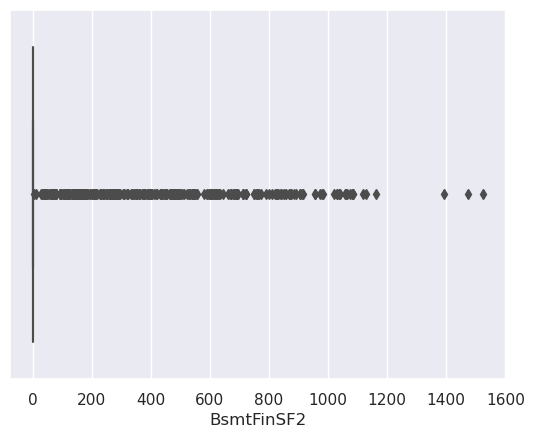

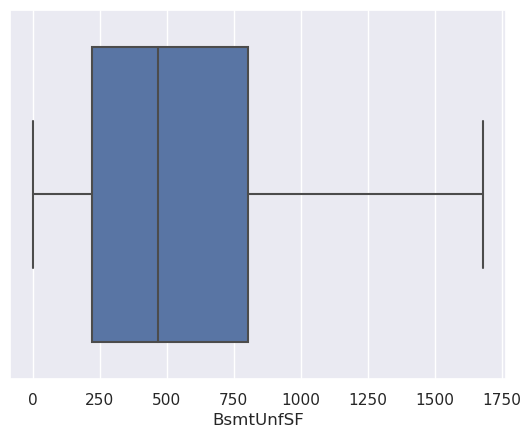

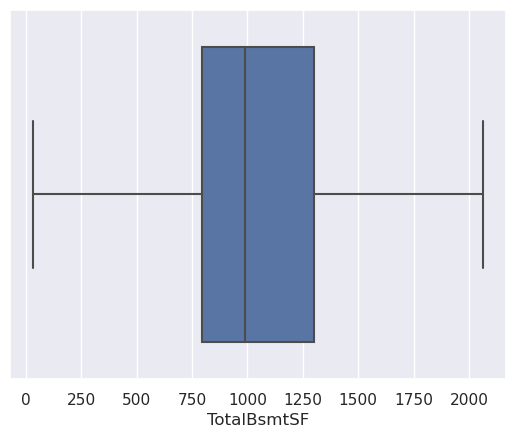

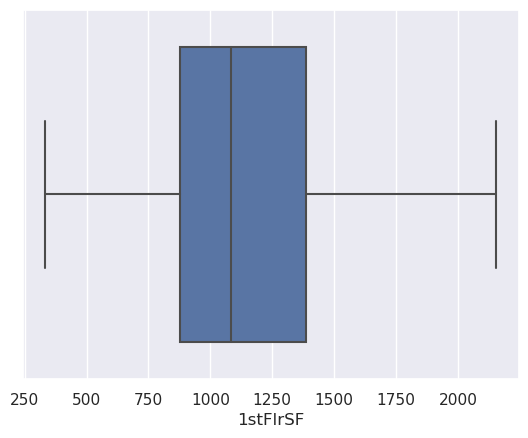

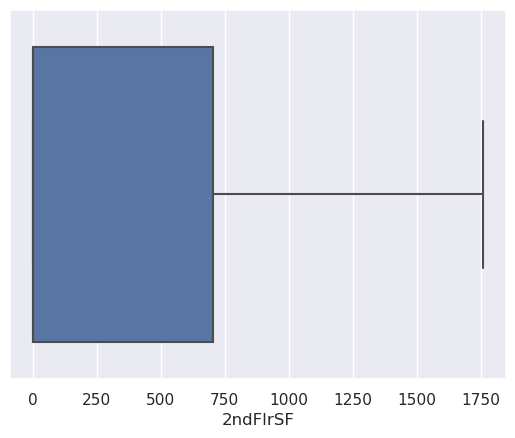

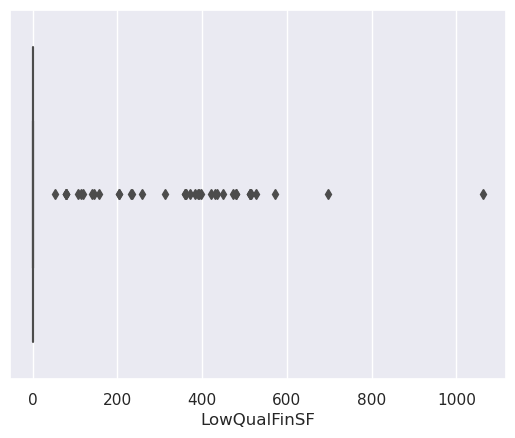

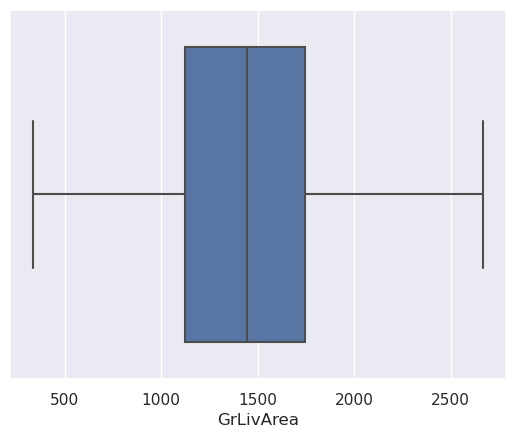

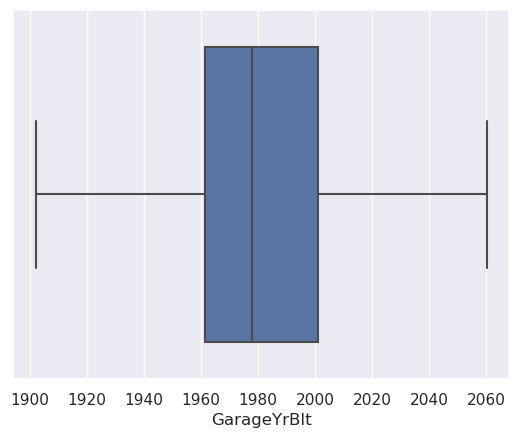

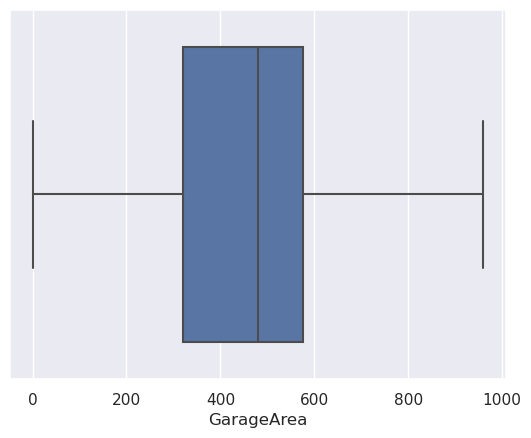

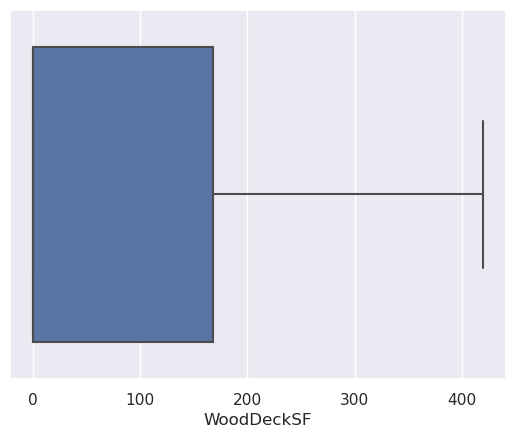

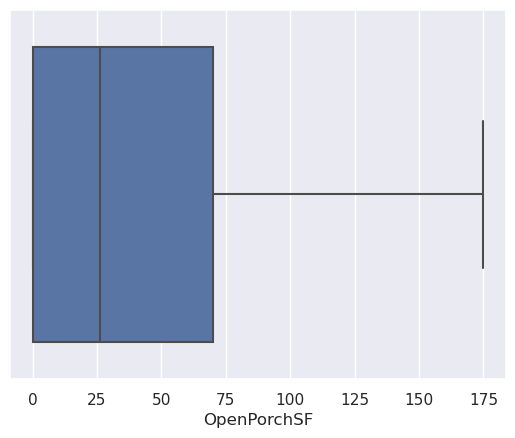

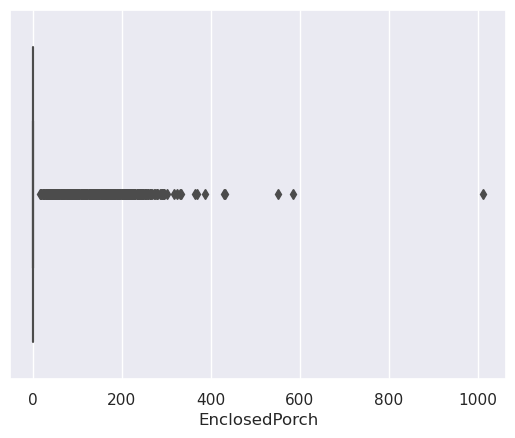

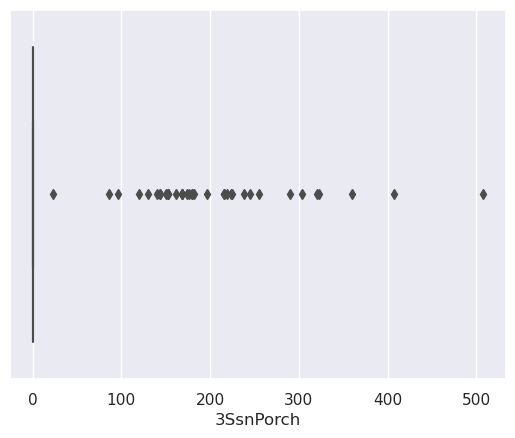

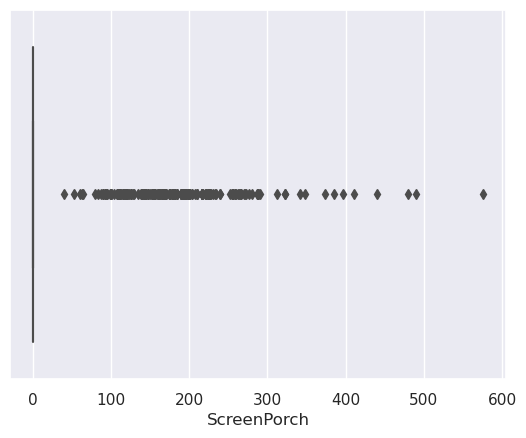

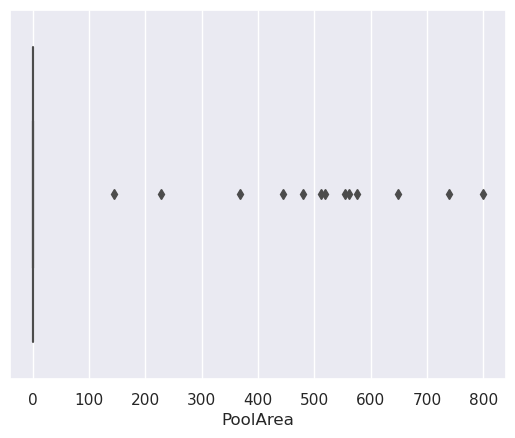

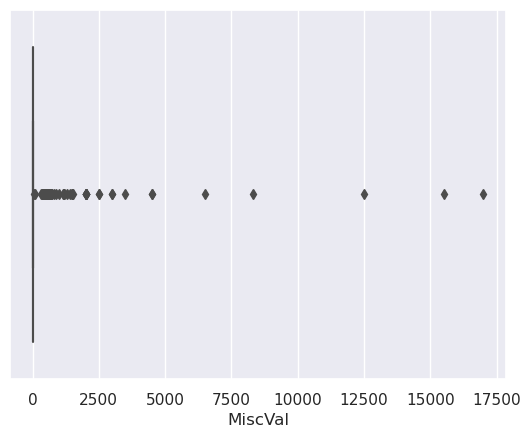

In [53]:
continuous = ['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',  'GarageYrBlt',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for col in continuous :
    sns.boxplot(x = col , data = df)    
    plt.show()
    #print(f'Column values for {col} : {sorted(set(df[col].values))}')

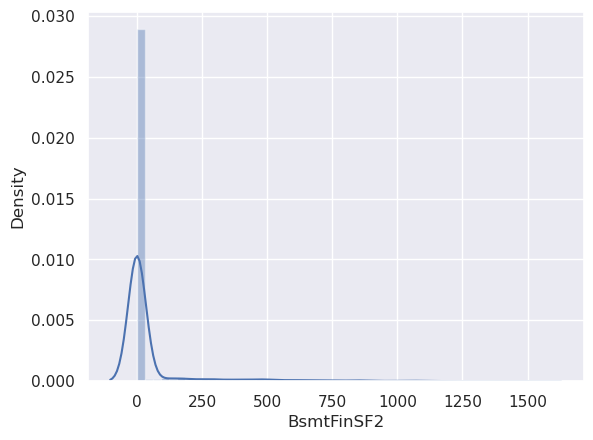

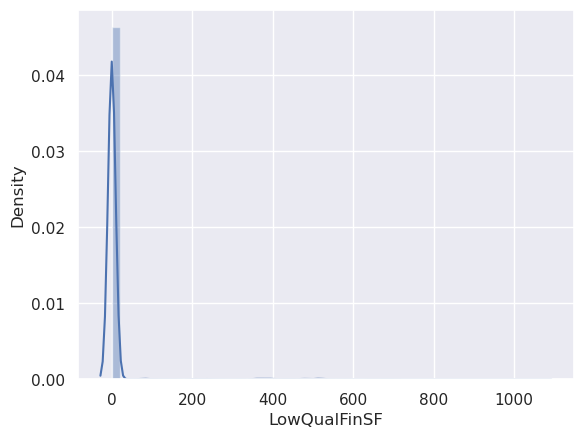

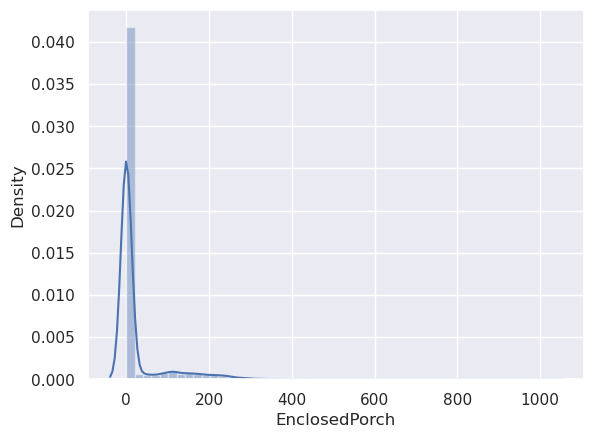

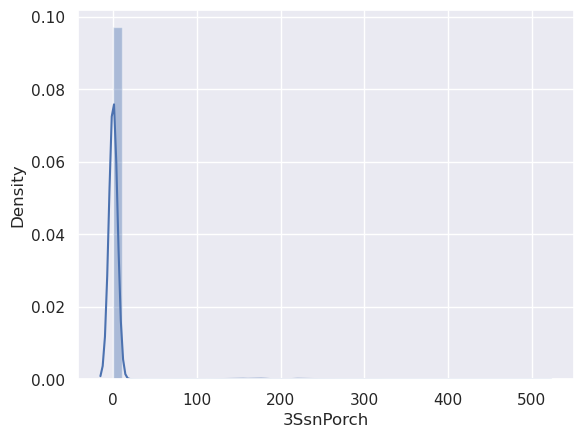

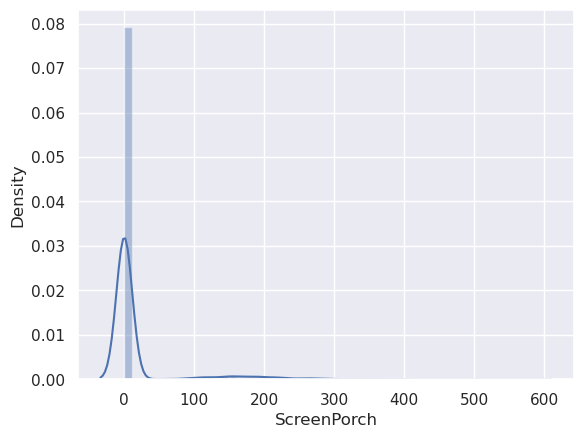

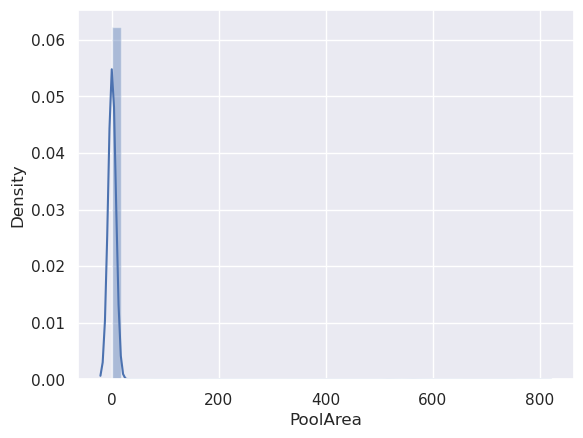

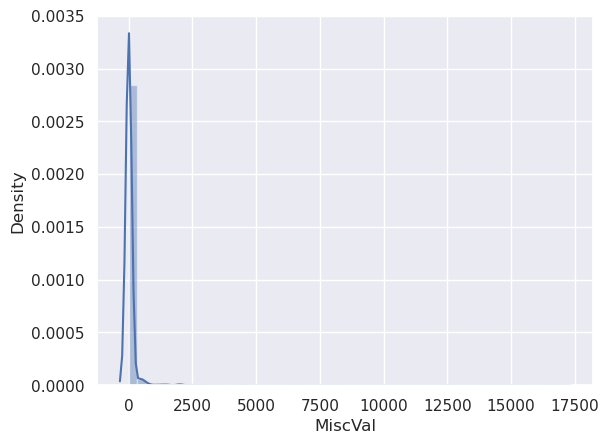

In [54]:
zero_infl = ['BsmtFinSF2',  'LowQualFinSF',  'EnclosedPorch',  '3SsnPorch',  'ScreenPorch',  'PoolArea',  'MiscVal']

for col in zero_infl :
    sns.distplot(a = df[col])    
    plt.show()
    #print(f'Column values for {col} : {sorted(set(df[col].values))}')

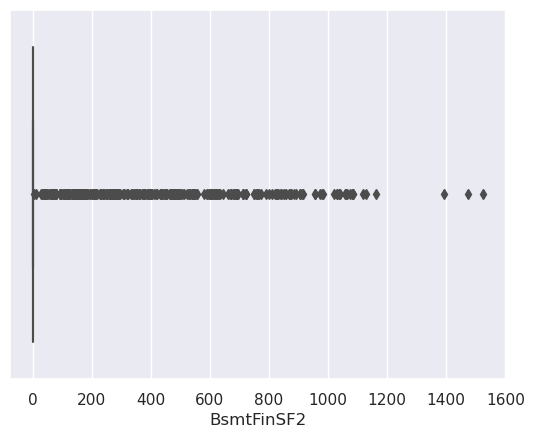

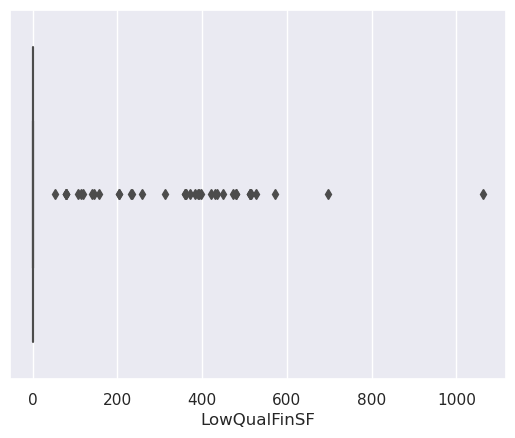

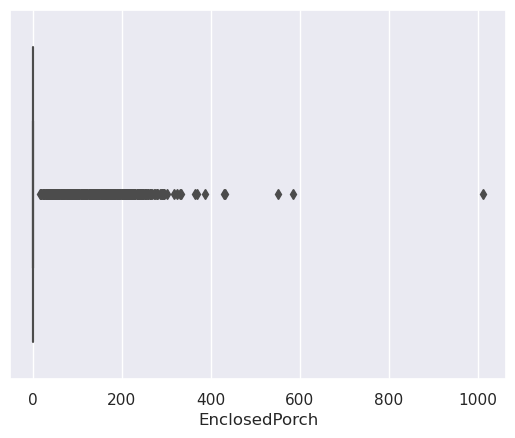

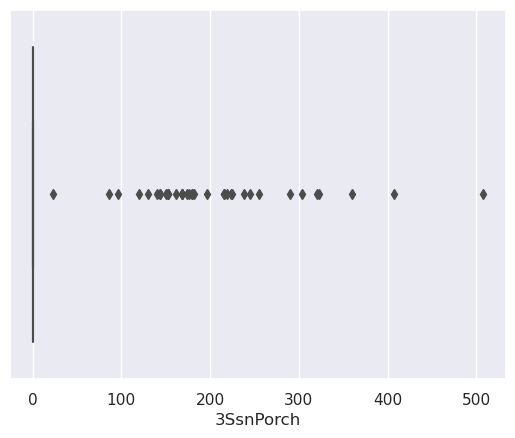

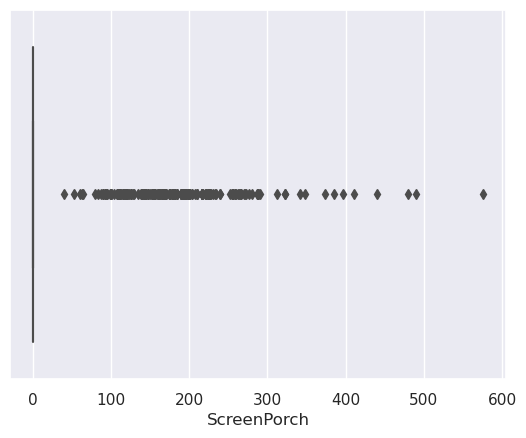

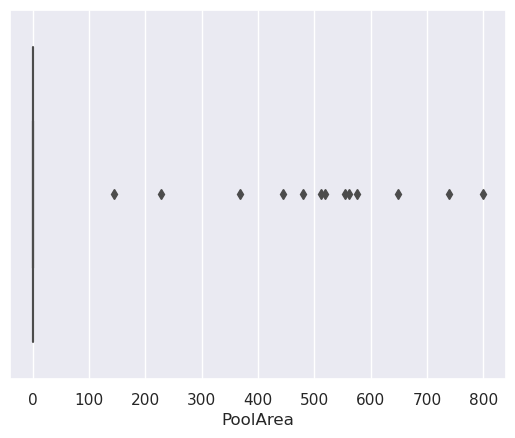

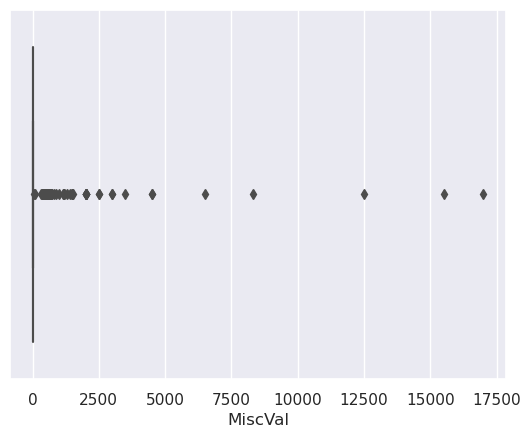

In [55]:
zero_infl = ['BsmtFinSF2',  'LowQualFinSF',  'EnclosedPorch',  '3SsnPorch',  'ScreenPorch',  'PoolArea',  'MiscVal']

for col in zero_infl :
    sns.boxplot(x = col , data = df)    
    plt.show()
    #print(f'Column values for {col} : {sorted(set(df[col].values))}')

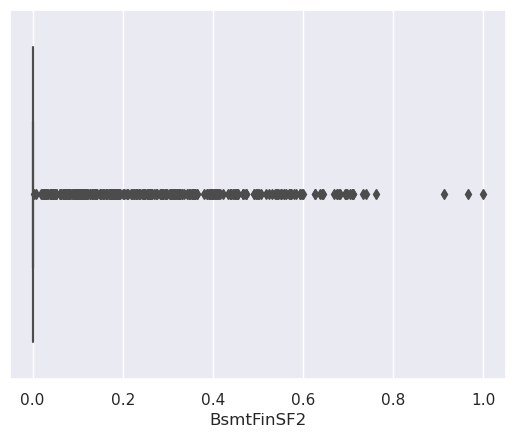

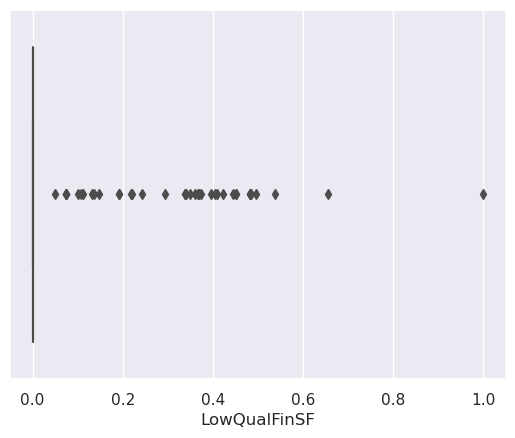

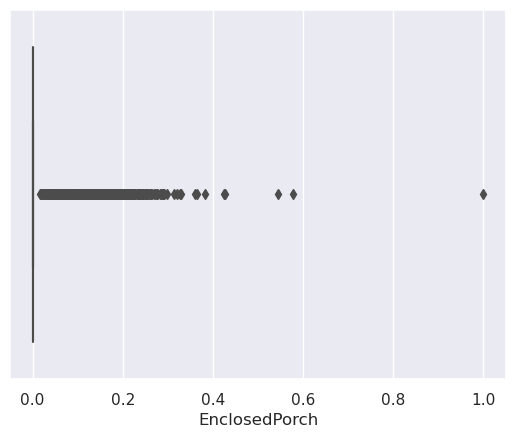

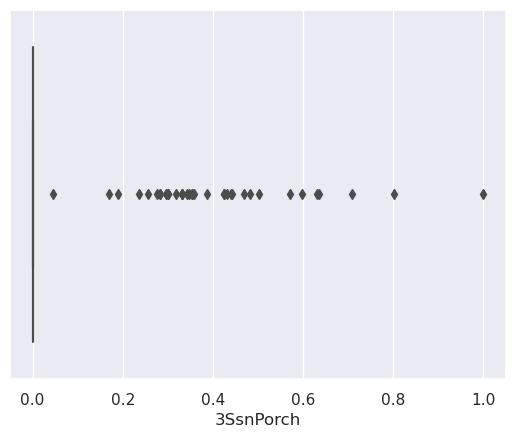

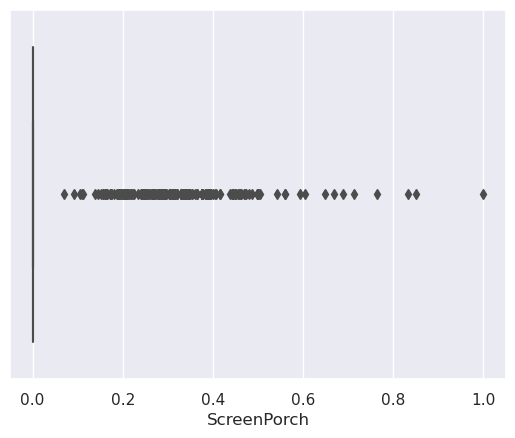

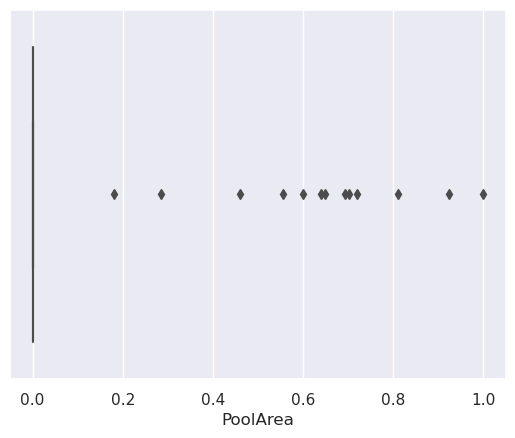

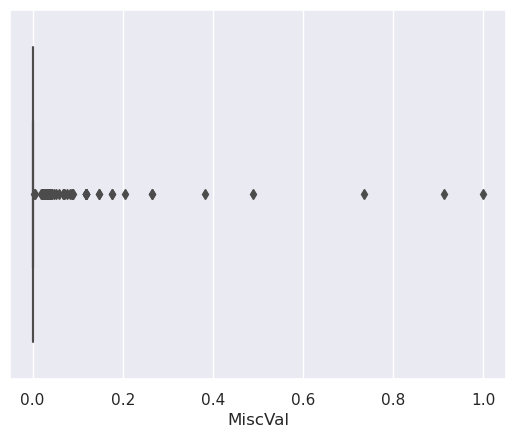

In [56]:
zero_infl = ['BsmtFinSF2',  'LowQualFinSF',  'EnclosedPorch',  '3SsnPorch',  'ScreenPorch',  'PoolArea',  'MiscVal']

for col in zero_infl :
    df[col] = df[col] /max(df[col])

    sns.boxplot(x = col , data = df)  
    plt.show()

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('SalePrice ~ Id' , data=df).fit()
anova_result = sm.stats.anova_lm(model)
print(anova_result)

# id is a reference field and has no relation with SalePrice , it can be dropped
# based on ANOVA test as well , we see that there are no issues related to correlation

df.drop('Id',inplace=True,axis= 1)

              df        sum_sq       mean_sq         F    PR(>F)
Id           1.0  4.422952e+09  4.422952e+09  0.700676  0.402694
Residual  1458.0  9.203488e+12  6.312406e+09       NaN       NaN


In [58]:
ohe_df = pd.get_dummies(df, drop_first=True)

In [59]:
x = ohe_df.drop(['SalePrice'], axis=1)
y = ohe_df['SalePrice'].dropna()


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

variable = x_scaler

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x.columns
vif.sort_values(by = 'VIF',ascending=False)

,VIF,Features
152,98.079036,Exterior2nd_VinylSd
114,97.426053,RoofStyle_Gable
137,92.691405,Exterior1st_VinylSd
116,91.895316,RoofStyle_Hip
19,78.568072,BsmtFinSF1
22,78.005276,BsmtUnfSF
23,76.933451,TotalBsmtSF
147,62.120366,Exterior2nd_MetalSd
29,61.191042,GrLivArea
133,58.788762,Exterior1st_MetalSd


In [61]:
high_vif = vif[vif['VIF'] > 5].Features.values

In [62]:
ohe_df.drop(high_vif,axis=1,inplace=True)

In [63]:
ohe_df_train = ohe_df[ohe_df['data_Train'] == 1].drop(['data_Train'],axis=1)
ohe_df_test = ohe_df[ohe_df['data_Train'] == 0].drop(['data_Train'],axis =1)

In [64]:
ohe_df_test.shape

(1459, 110)

In [65]:
# split the data into independent and dependent variable
x = ohe_df_train.drop(['SalePrice'],axis=1)
y = ohe_df_train['SalePrice']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


#x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
#x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

In [66]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [67]:
regression_model = smf.OLS(endog=y_train, exog=x_train).fit()

In [68]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              324.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:20:26   Log-Likelihood:                         -12044.
No. Observations:                1022   AIC:                                  2.430e+04
Df Residuals:                     915   BIC:                                  2.483e+04
Df Model:                         107                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage             224.3514     90.520      2.478      0.013      46.700     402.002
LotArea                   4.4954      0.483      9.307      0.000       3.547       5.443
Street                 6573.2903   1.76e+04      0.373      0.709    -2.8e+04    4.11e+04
LotShape               2034.9381   2312.217      0.880      0.379   -2502.926    6572.802
LandContour            6078.2171   2620.959      2.319      0.021     934.429    1.12e+04
Utilities              3.178e+04   1.89e+04      1.679      0.094   -5375.835    6.89e+04
LandSlope              1000.7453   4821.207      0.208      0.836   -8461.162    1.05e+04
OverallQual            1.944e+04   1522.767     12.763      0.000    1.64e+04    2.24e+04
OverallCond            4184.7022   1213.189      3.449      0.001    1803.747    6565.658
YearRemodAdd             30.9564     83.218      0.372      0.710    -132.365     194.278
MasVnrArea               49.0894      9.887      4.965      0.000      29.685      68.494
ExterQual              1.815e+04   3314.205      5.477      0.000    1.16e+04    2.47e+04
ExterCond             -6788.6833   3631.405     -1.869      0.062   -1.39e+04     338.168
BsmtCond              -2018.6508   2978.519     -0.678      0.498   -7864.172    3826.871
BsmtExposure           5789.0182   1336.508      4.331      0.000    3166.040    8411.996
BsmtFinType1           2113.8541    722.515      2.926      0.004     695.876    3531.832
BsmtFinType2           -169.2379   1283.672     -0.132      0.895   -2688.521    2350.046
HeatingQC              2955.8235   1517.485      1.948      0.052     -22.333    5933.980
CentralAir            -1.179e+04   6158.829     -1.914      0.056   -2.39e+04     297.330
LowQualFinSF          -1.282e+04   3.28e+04     -0.391      0.696   -7.72e+04    5.16e+04
BsmtFullBath           7103.5696   2990.344      2.376      0.018    1234.839     1.3e+04
BsmtHalfBath          -4745.1542   4910.286     -0.966      0.334   -1.44e+04    4891.576
FullBath               1.476e+04   3025.188      4.878      0.000    8819.664    2.07e+04
HalfBath               6650.4498   2619.312      2.539      0.011    1509.894    1.18e+04
BedroomAbvGr           -824.1045   1820.044     -0.453      0.651   -4396.049    2747.840
KitchenAbvGr          -2871.5352   7813.526     -0.368      0.713   -1.82e+04    1.25e+04
KitchenQual             1.19e+04   2698.377      4.411      0.000    6606.900    1.72e+04
Functional              252.0598   1834.075      0.137      0.891   -3347.422    3851.542
Fireplaces             9180.8248   2083.131      4.407      0.000    5092.555    1.33e+04
GarageFinish           2188.3809   1717.710      1.274      0.203   -1182.727    5559.489
PavedDrive    

In [69]:
pvalue_high = regression_model.pvalues[regression_model.pvalues > 0.05].index

In [70]:
x_train.drop(pvalue_high,axis=1,inplace=True)
x_test.drop(pvalue_high,axis=1,inplace=True)

In [71]:
x_train.shape , x_test.shape

((1022, 28), (438, 28))

In [72]:
# sklearn linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [74]:
# evaluate the model
from sklearn.metrics import r2_score

print("Training Accuracy ", r2_score(y_train, y_pred_train))
print("************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test))

Training Accuracy  0.8273187218480751
************************************************************************************************************************
Test Accuracy  0.761271096276754


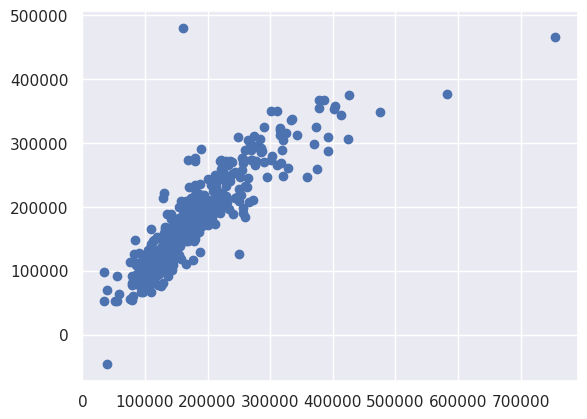

In [75]:
# Linearity
plt.scatter(y_test, y_pred_test)

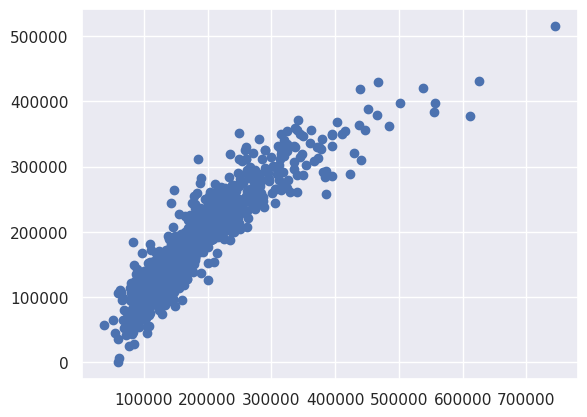

In [76]:
plt.scatter(y_train, y_pred_train)

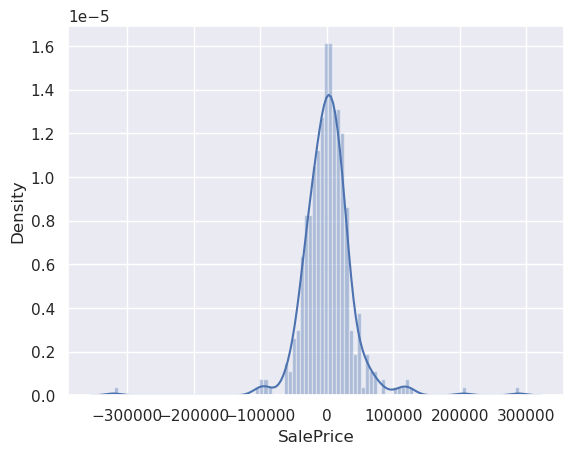

In [77]:
# Residual - normality

sns.distplot((y_test - y_pred_test), bins=100)

plt.show()

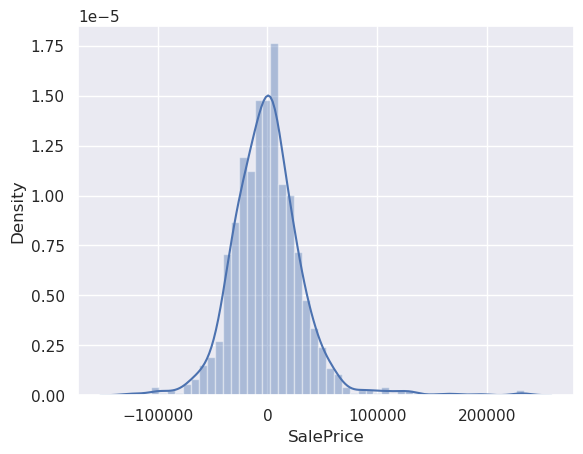

In [78]:
sns.distplot((y_train - y_pred_train), bins=50)

plt.show()

In [79]:
from sklearn.linear_model import Ridge

for i in range(0,6):
    power = 10 ** (-1*i) 
    ridge = Ridge(alpha= power )
    ridge.fit(x_train, y_train)
    y_test_pred = ridge.predict(x_test)
    y_train_pred = ridge.predict(x_train)
    print(f'For {power} as alpha :' )
    print(f'        For TRAIN :  {r2_score(y_train, y_train_pred):.5f}')
    print(f'        For TEST :  {r2_score(y_test, y_test_pred):.5f}')

For 1 as alpha :
        For TRAIN :  0.82628
        For TEST :  0.76624
For 0.1 as alpha :
        For TRAIN :  0.82729
        For TEST :  0.76201
For 0.01 as alpha :
        For TRAIN :  0.82732
        For TEST :  0.76135
For 0.001 as alpha :
        For TRAIN :  0.82732
        For TEST :  0.76128
For 0.0001 as alpha :
        For TRAIN :  0.82732
        For TEST :  0.76127
For 1e-05 as alpha :
        For TRAIN :  0.82732
        For TEST :  0.76127


In [80]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(x_train)
test = scaler.fit_transform(x_test)
x_train = pd.DataFrame(train,columns = x_train.columns)
x_test =  pd.DataFrame(test,columns = x_test.columns)


sgd.fit(x_train, y_train)

y_test_pred = sgd.predict(x_test)
y_train_pred = sgd.predict(x_train)
print(f'For TRAIN :  {r2_score(y_train, y_train_pred):.5f}')
print(f'For TEST :  {r2_score(y_test, y_test_pred):.5f}')

For TRAIN :  0.82649
For TEST :  0.76478


In [81]:
ohe_df_test.head()

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearRemodAdd,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,80.0,11622.0,1,4,0,4,1,5,6,1961.0,...,0,0,0,0,0,0,0,0,0,1
1,81.0,14267.0,1,3,0,4,1,6,6,1958.0,...,0,0,0,0,0,0,0,0,0,1
2,74.0,13830.0,1,3,0,4,1,5,5,1998.0,...,0,0,0,0,0,0,0,0,0,1
3,78.0,9978.0,1,3,0,4,1,6,6,1998.0,...,0,0,0,0,0,0,0,0,0,1
4,43.0,5005.0,1,3,2,4,1,8,5,1992.0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
ohe_df_test.drop(['SalePrice'],axis=1,inplace=True)

In [83]:
ohe_df_test.drop(pvalue_high,axis=1,inplace=True)

In [84]:
y_pred_test = lr.predict(ohe_df_test)

In [85]:
len(y_pred_test) , len(df_test['Id'])

(1459, 1459)

In [86]:
result = pd.DataFrame(columns=['Id','SalePrice'])

In [87]:
result

,Id,SalePrice


In [88]:
result['Id'] = df_test['Id']

In [89]:
result['SalePrice'] = y_pred_test

In [90]:
#result.to_csv('submission.csv')

In [91]:
result.head()

,Id,SalePrice
0,1461,114786.711986
1,1462,184070.872453
2,1463,167595.755582
3,1464,189644.301023
4,1465,255663.100123


In [92]:
result.to_csv('submission.csv', index=False)